# Heart Disease Prediction: A Comparative Study of Optimizers Performance in Deep Neural Networks


In this study, we seek to evaluate different optimizers in training a deep neural network to predict heart diseases.

Our dataset was gotten from [kaggle](https://www.kaggle.com/datasets/mexwell/heart-disease-dataset). Find attached the data dictionary [here](https://github.com/chisomruth/HEART-DISEASE-PREDICTION-A-Comparative-Study-of-Optimizers-Performance-in-Deep-Neural-Network/blob/main/Heart%20disease/documentation.pdf)

In [1]:

#importing the necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold, ParameterGrid, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam, Ftrl
from tensorflow.keras.optimizers import AdamW
#from tensorflow_addons.optimizers import Yogi, NovoGrad
import time

import warnings 
warnings.filterwarnings("ignore")
print("libraries succesfully installed")

libraries succesfully installed


Now, let's read in our data

In [2]:
heart_disease = pd.read_csv(r"C:\Users\chiso\OneDrive\Documents\Predicting heart diseases\Heart disease\heart_statlog_cleveland_hungary_final.csv")
heart_disease_data = heart_disease.copy() #making a copy of our data
heart_disease_data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


### Descriptive Analysis

In [3]:
#checking the shape of our dataframe
heart_disease_data.shape

(1190, 12)

Our dataset has 1,190 rows and 12 columns

In [4]:
#checking a summary of information in our dataset
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


All features in our dataset are of numeric datatype since some of the categories in these features have been encoded

In [5]:
#checking for summary statistics of our dataframe
heart_disease_data.describe(include = 'all')

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [6]:
#checking the different columns in our dataframe
heart_disease_data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

## Exploratory analysis

In [7]:
#making a list of the numeric columns in our dataframe
list_numeric_col= list(heart_disease_data.select_dtypes(include = ["int64", "float"]).columns)

In [8]:
#printing the numeric columns
list_numeric_col

['age',
 'sex',
 'chest pain type',
 'resting bp s',
 'cholesterol',
 'fasting blood sugar',
 'resting ecg',
 'max heart rate',
 'exercise angina',
 'oldpeak',
 'ST slope',
 'target']

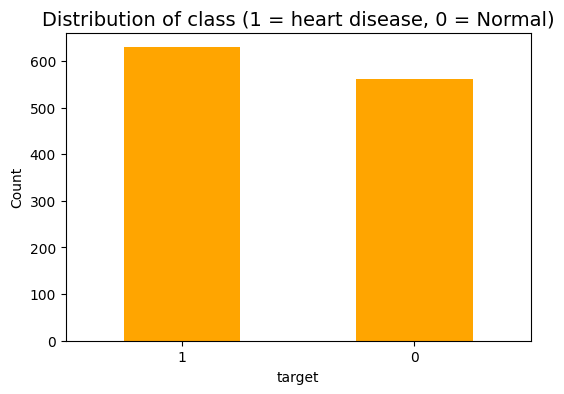

In [9]:
#plotting a distribution of our target variable
heart_disease_data["target"].value_counts().plot(kind="bar", figsize=(6,4), rot=0, color="orange")
plt.title("Distribution of class (1 = heart disease, 0 = Normal)", fontsize=14)
plt.xlabel("target")
plt.ylabel("Count")
plt.show()

our data is quite balanced with respect to our target variable.
Hence, there is no need to handle Data imbalance

### Univariate analysis

In [10]:
#creating a list of our numeric features to be plotted as histogram
histplot_data = ['age','resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

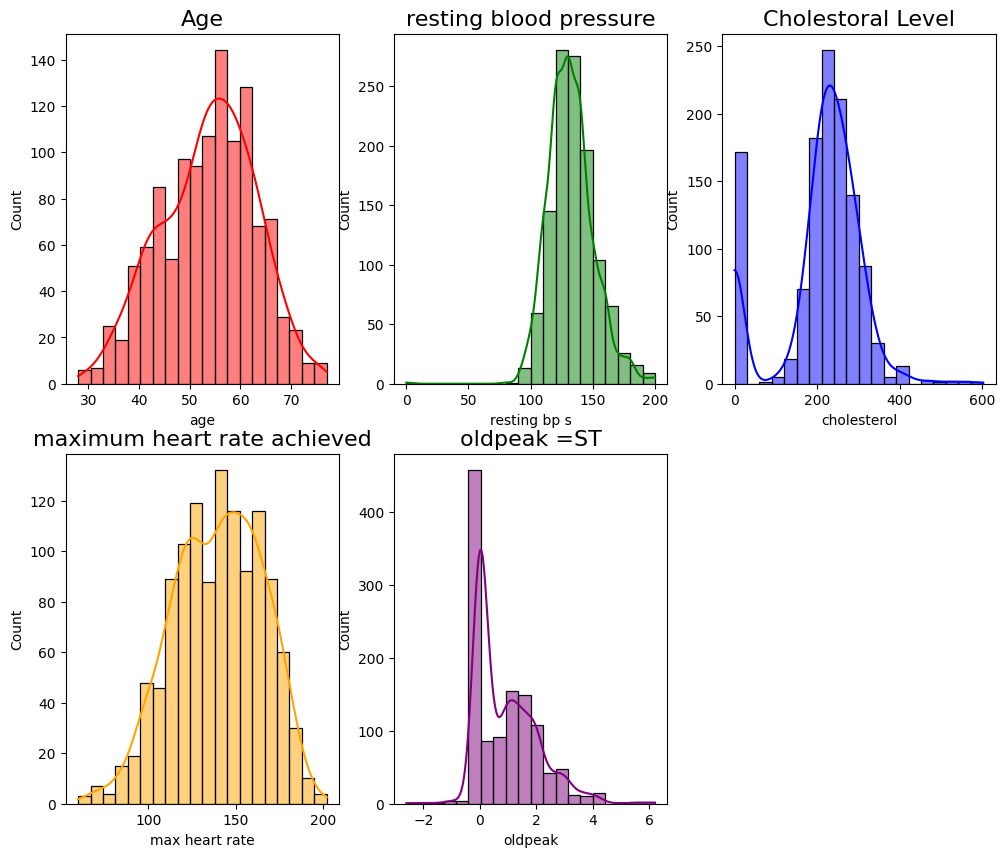

In [11]:
#plotting the distribution of the features in our histplot_data list
fig=plt.figure(figsize=(12,10))

ax=fig.add_subplot(231)
sns.histplot(heart_disease_data["age"], color="red", label="age", kde=True, bins=20, ax=ax)
ax.set_title('Age', fontsize=16)


ax=fig.add_subplot(232)
sns.histplot(heart_disease_data['resting bp s'], color="green", label='resting bp s', bins=20, kde=True, ax=ax)
ax.set_title('resting blood pressure', fontsize=16)

ax=fig.add_subplot(233)
sns.histplot(heart_disease_data['cholesterol'], color="blue", label='cholesterol',bins=20, kde=True, ax=ax)
ax.set_title('Cholestoral Level', fontsize=16)

ax=fig.add_subplot(234)
sns.histplot(heart_disease_data['max heart rate'], color="orange", label='max heart rate', kde=True, bins=20, ax=ax)
ax.set_title('maximum heart rate achieved', fontsize=16)


ax=fig.add_subplot(235)
sns.histplot(heart_disease_data['oldpeak'], color="purple", label='oldpeak', bins=20, kde=True, ax=ax)
ax.set_title('oldpeak =ST', fontsize=16)

plt.show()

our age and Max heart reate achieved features are almost normally distributed

In [12]:
#defining a function that counts the number of observations in each category for our categorical features
def val_count(data, histplot_data):
    value_counts = {}
    for col in data.columns:
        if col not in histplot_data:
            val_ct = data[col].value_counts()
            value_counts[col] = val_ct
    return value_counts

In [13]:
value_counts = val_count(heart_disease_data, histplot_data= histplot_data)

In [14]:
for col, counts in value_counts.items():
    print(f'Value counts for {col} column:\n{counts}\n')

Value counts for sex column:
sex
1    909
0    281
Name: count, dtype: int64

Value counts for chest pain type column:
chest pain type
4    625
3    283
2    216
1     66
Name: count, dtype: int64

Value counts for fasting blood sugar column:
fasting blood sugar
0    936
1    254
Name: count, dtype: int64

Value counts for resting ecg column:
resting ecg
0    684
2    325
1    181
Name: count, dtype: int64

Value counts for exercise angina column:
exercise angina
0    729
1    461
Name: count, dtype: int64

Value counts for ST slope column:
ST slope
2    582
1    526
3     81
0      1
Name: count, dtype: int64

Value counts for target column:
target
1    629
0    561
Name: count, dtype: int64



In [15]:
#printing our categorical features
for col in heart_disease_data.columns:
        if col not in histplot_data:
            print(col)

sex
chest pain type
fasting blood sugar
resting ecg
exercise angina
ST slope
target


we see that apart from our target variable, we have 6 categorical features

In [16]:
#defining a function that plots the distribution of our categorical variable
def count_plot(data):
    for col in data.columns:
        if col not in histplot_data:
            sns.countplot(data= data, x = col, color= 'darkred')
            plt.xlabel(col)
            plt.ylabel("Values")
            plt.title(f"Distribution of {col}")
            plt.show()

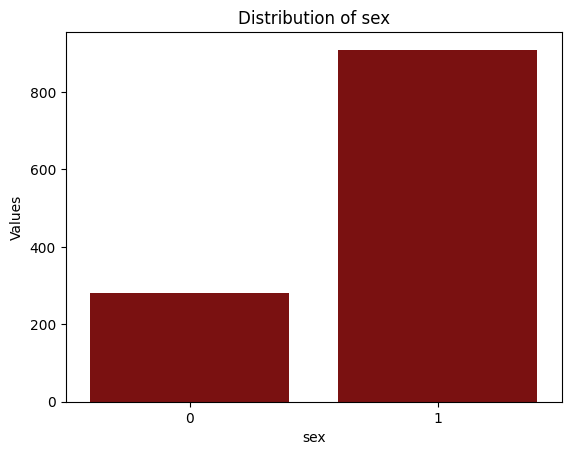

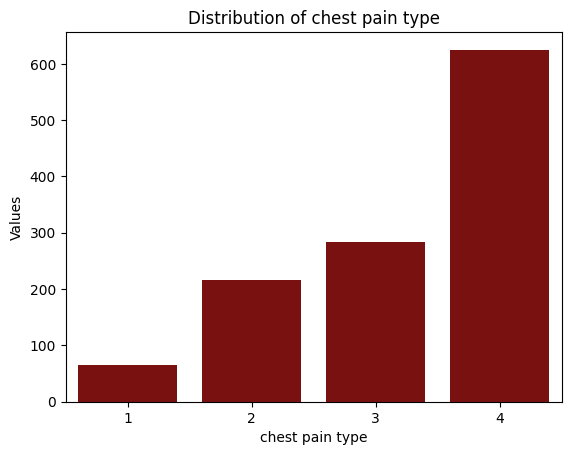

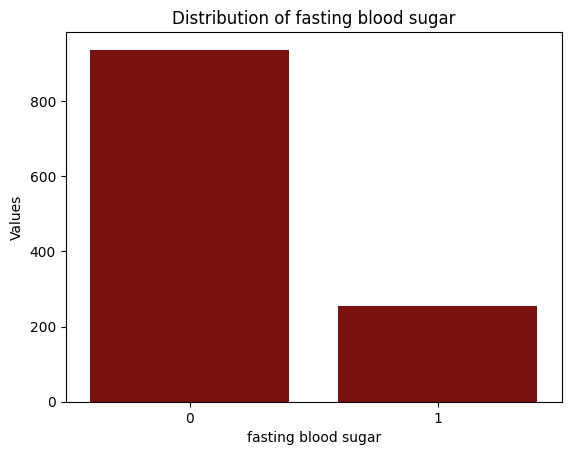

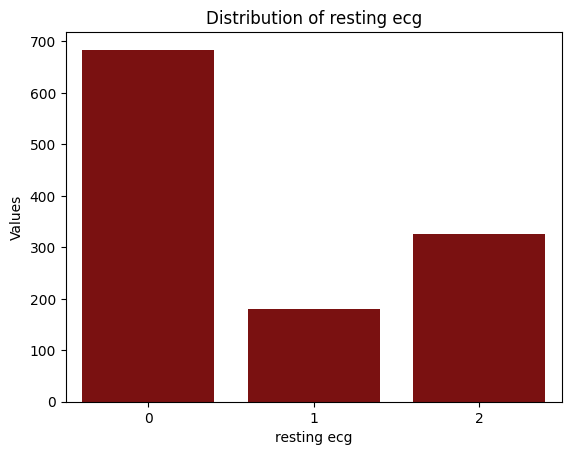

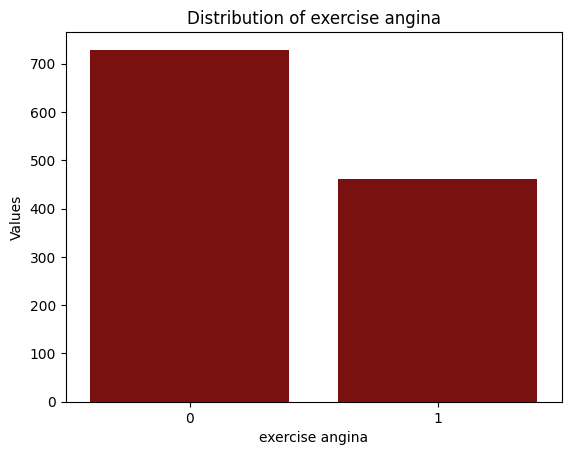

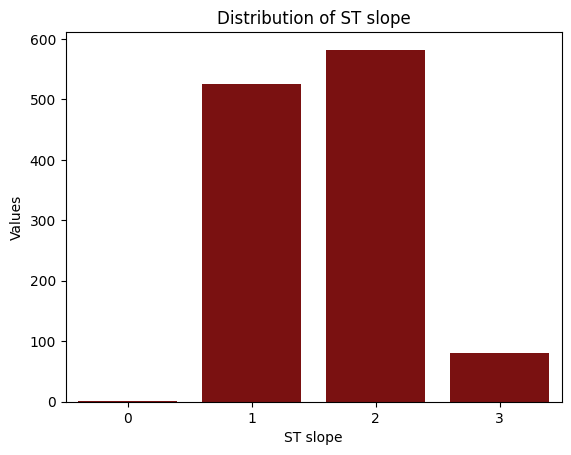

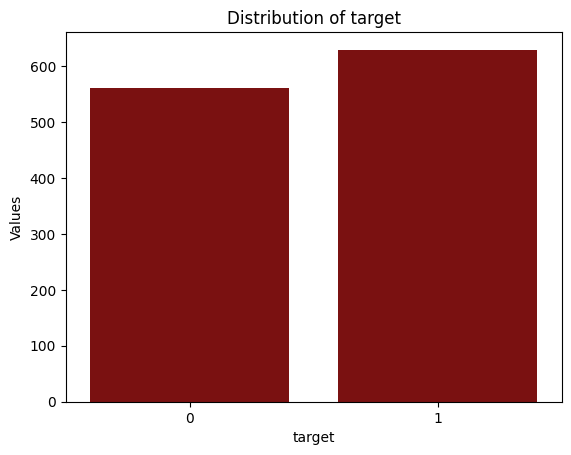

In [17]:
#plotting the distribution
count_plot(heart_disease_data)

- Majority of individuals with heart diseases are male(1)
- Most individuals have the asymptomatic chest pain type (4)
- Most individuals have fasting blood sugar that are not greater than 120 mg/dl(0)
- Most individuals have normal Resting electrocardiogram results (0)
- Most individuals  angina are not exercise induced (0)
- The slope of the peak exercise ST segment of most individuals are either 2: flat or 3: downsloping


### Bivariate analysis

Let us plot a heat map to see the correlation between different categories in our dataframe

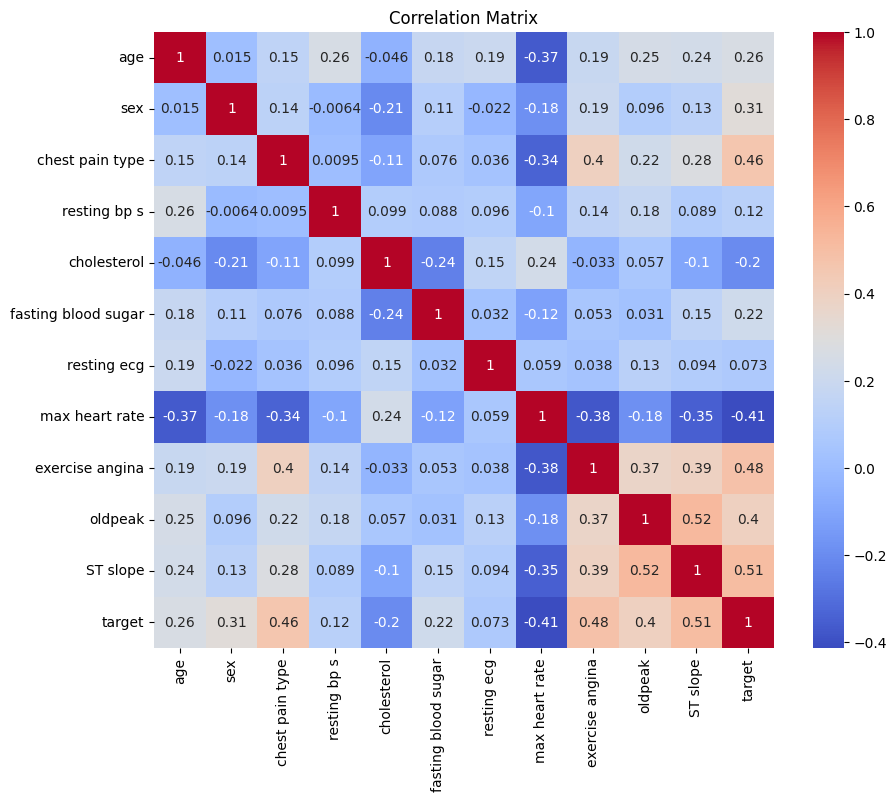

In [18]:
plt.figure(figsize = (10,8))
correlation_matrix = heart_disease_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We can see that ST slope, exercise angina, chest pain type, maximum heart rate, oldpeak, have close to strong correlation with our target variable.

In [19]:
#re-viewing the list of our numeric features
list_numeric_col

['age',
 'sex',
 'chest pain type',
 'resting bp s',
 'cholesterol',
 'fasting blood sugar',
 'resting ecg',
 'max heart rate',
 'exercise angina',
 'oldpeak',
 'ST slope',
 'target']

Next, we will conduct bivariage analysis to better understand the distribution/impact of various features on our target variable

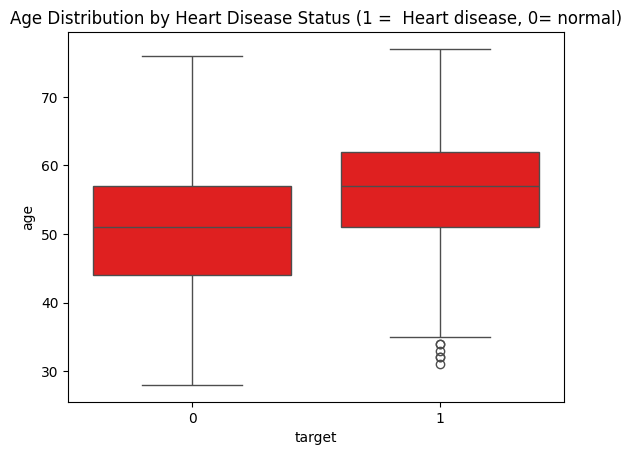

In [20]:
#plotting the distribution of our target variable by age using boxplot.
sns.boxplot(heart_disease_data, x="target", y="age", color = 'red')
plt.title('Age Distribution by Heart Disease Status (1 =  Heart disease, 0= normal)')
plt.show()


We notice that the median age of individuals without a heart disease is around 52, while the median age of individuals with a heart disease is around 57.

Next, we implement the same distribution using a violin plot to see the density of the distribution.

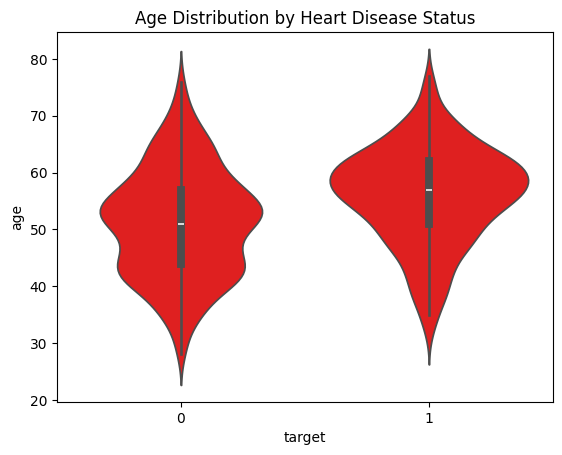

In [21]:
sns.violinplot(x='target', y='age', data=heart_disease_data, color ='red')
plt.title('Age Distribution by Heart Disease Status')
plt.show()

Majority of indivduals with heart diseases are centered around 55-65 years

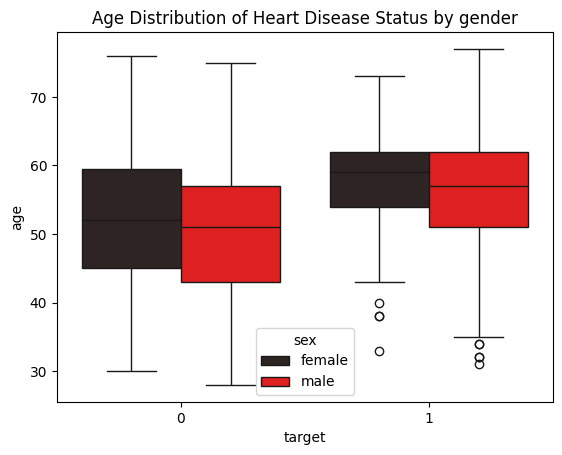

In [22]:
#visualizing the age distribution of individuals with heart diseases by sex
ax = sns.boxplot(heart_disease_data,x="target", y="age",hue="sex", color = 'red')
plt.title('Age Distribution of Heart Disease Status by gender')
handles, labels = ax.get_legend_handles_labels()
labels = ['male' if label == '1' else 'female' for label in labels]
ax.legend(handles, labels, title='sex')


plt.show()

Here, we notice that the median age of  male gender with a heart disease is around 56, while the median age of female with a heart disease is around 58.

   target  sex  count  total_count  percentage
0       0    0    211          561   37.611408
1       0    1    350          561   62.388592
2       1    0     70          629   11.128776
3       1    1    559          629   88.871224


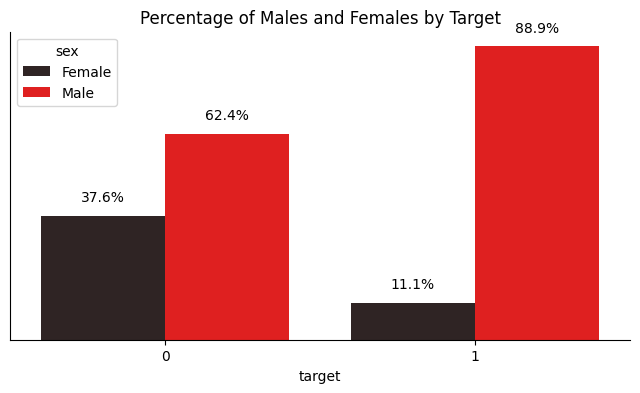

In [23]:

#plotting the percentage distribution of the male and female gender by target variable
counts = heart_disease_data.groupby(['target', 'sex']).size().reset_index(name='count')
total_counts = counts.groupby('target')['count'].sum().reset_index(name='total_count')
percentages = counts.merge(total_counts, on='target')
percentages['percentage'] = 100 * percentages['count'] / percentages['total_count']

print(percentages)
percentages['sex'] = percentages['sex'].map({0: 'Female', 1: 'Male'})

# Creating the plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=percentages, x='target', y='percentage', hue='sex', color = 'red')
ax.set_title('Percentage of Males and Females by Target')

ax.set(ylabel='')
ax.set(yticks=[])
ax.tick_params(left=False)

# Removing the black line surrounding the chart
sns.despine()

# Adding percentage labels on the outside end of the bars
for p in ax.patches:
    height = p.get_height()  # get bar height
    if height > 0:  # Skipping the annotation for bars with height 0
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', 
                    xytext=(0, 8), 
                    textcoords='offset points')

# Showing the plot
plt.show()

- 88% of individuals with a heart disease are males

In [24]:
#viewing the columns in our dataset again
heart_disease_data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

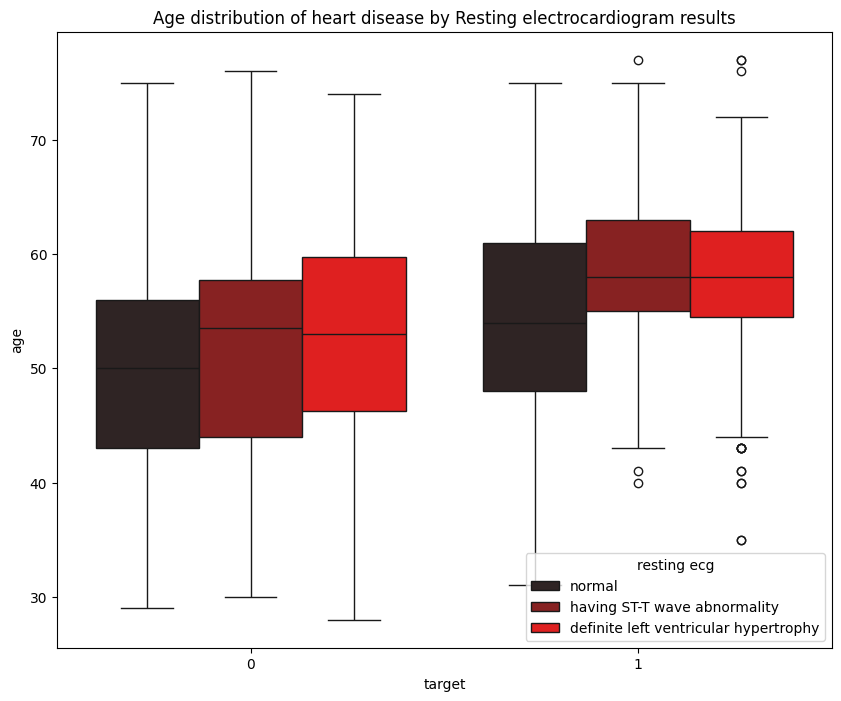

In [25]:
#plotting the age distribution of individuals with a heart disease by their Resting electrocardiogram results
plt.figure(figsize=(10,8))
ax = sns.boxplot(heart_disease_data,x="target", y="age",hue="resting ecg", color = 'red')
plt.title('Age distribution of heart disease by Resting electrocardiogram results')

handles, labels = ax.get_legend_handles_labels()
new_labels = ['normal', 'having ST-T wave abnormality', 'definite left ventricular hypertrophy']
ax.legend(handles, new_labels, title='resting ecg')


plt.show()



- median Age of Individuals without a heart disease having normal Resting electrocardiogram results is 51
- While median Age of Individuals with a heart disease having normal Resting electrocardiogram results range between 54

Next, we implement the same distribution using a violin plot to see the density of the distribution 

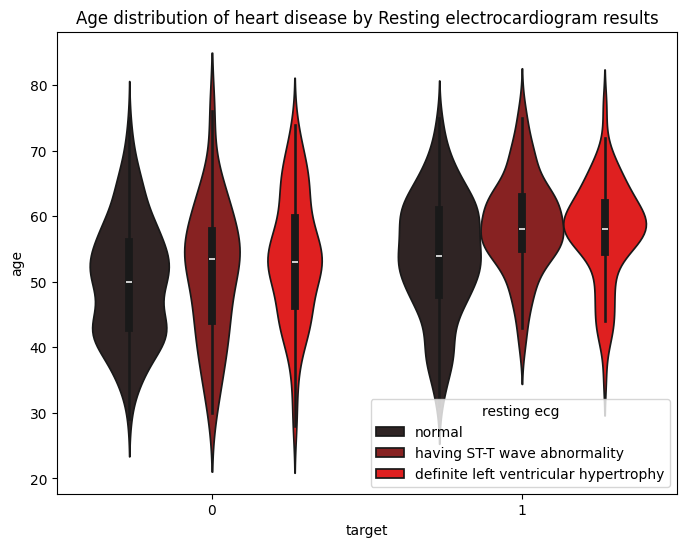

In [26]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(heart_disease_data,x="target", y="age",hue="resting ecg", color = 'red')
plt.title('Age distribution of heart disease by Resting electrocardiogram results')

handles, labels = ax.get_legend_handles_labels()
new_labels = ['normal', 'having ST-T wave abnormality', 'definite left ventricular hypertrophy']
ax.legend(handles, new_labels, title='resting ecg')
plt.show()

- majority of Individuals without a heart disease having normal Resting electrocardiogram results fall between age range 41-54
- While majority of Individuals with a heart disease having normal Resting electrocardiogram results fall within age range 50-59

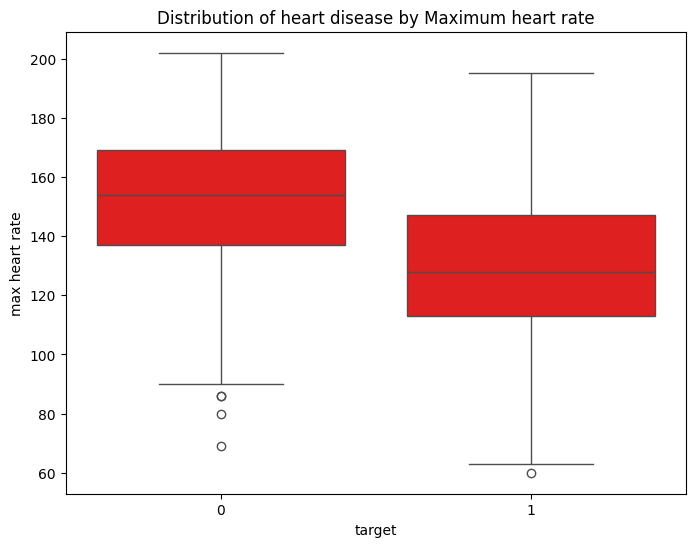

In [27]:
#visualizing the Distribution of heart disease by Maximum heart rate
plt.figure(figsize=(8,6))
sns.boxplot(heart_disease_data,x="target", y='max heart rate', color = 'red')
plt.title('Distribution of heart disease by Maximum heart rate')
plt.show()

The maximum rate is based on your age, as subtracted from 220. So for a 50-year-old, maximum heart rate is 220 minus 50, or 170 beats per minute.

Hence, we see that individuals with lesser heart rate tend to have heart diseases, insinuating that they were older.

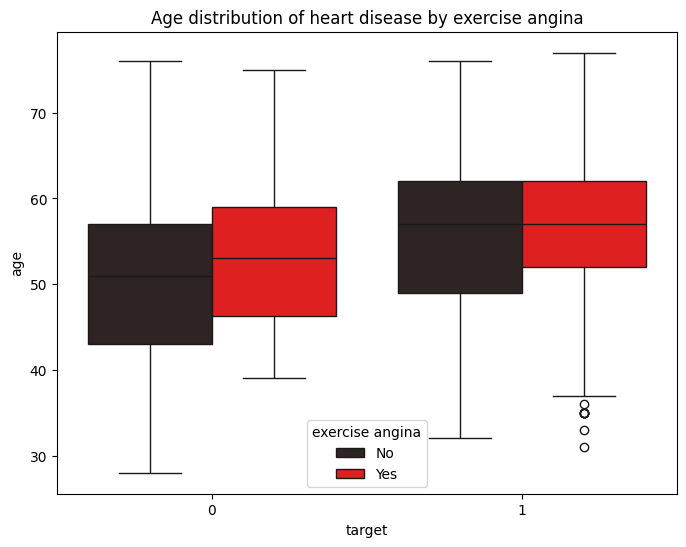

In [28]:
#visualizing the Age Distribution of individuals with heart disease by exercise angina
plt.figure(figsize=(8,6))
ax =sns.boxplot(heart_disease_data,x="target", y='age', hue = 'exercise angina', color = 'red')

plt.title('Age distribution of heart disease by exercise angina')

handles, labels = ax.get_legend_handles_labels()
labels = ['Yes' if label == '1' else 'No' for label in labels]
ax.legend(handles, labels, title='exercise angina')


plt.show()

- Individuals with a heart disease having no exercise induced angina have a median age of 58
- Same as individuals with exercise induced angina

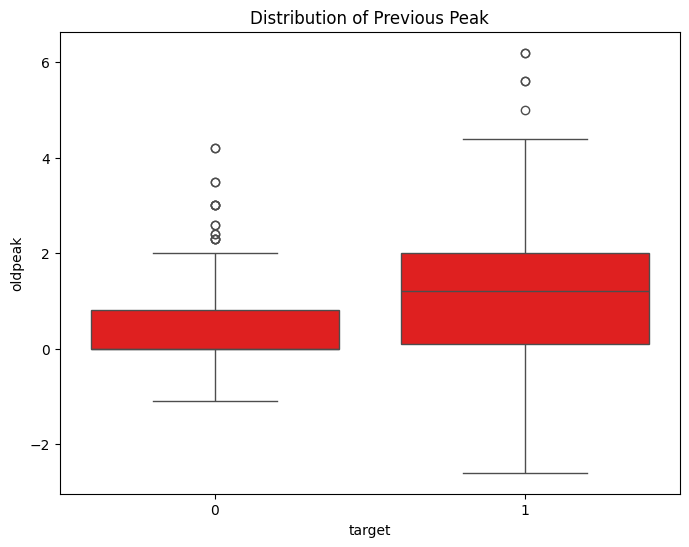

In [29]:
#visualizing the Distribution of individuals with heart disease by oldpeak
plt.figure(figsize=(8,6))
sns.boxplot(heart_disease_data,x="target", y='oldpeak', color = 'red')
plt.title('Distribution of Previous Peak')
plt.show()

In general, individuals with heart diseases had higher previous peak

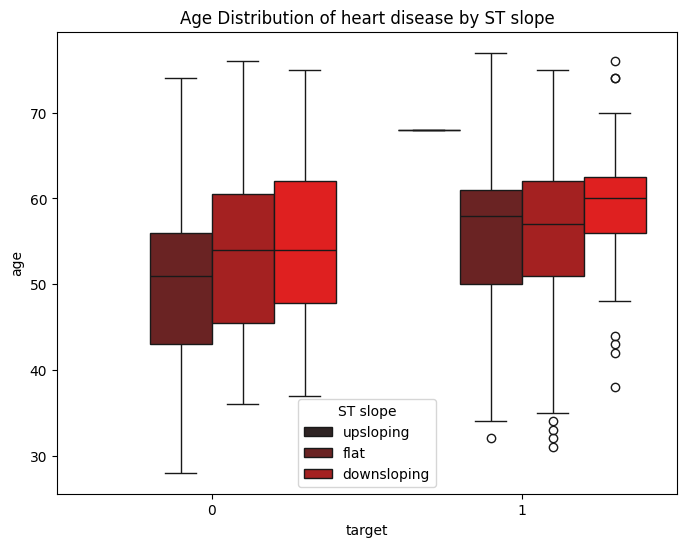

In [30]:
#visualizing the Age Distribution of individuals with heart disease by ST slope
plt.figure(figsize=(8,6))
ax = sns.boxplot(heart_disease_data,x="target", y='age', hue = 'ST slope', color = 'red')
plt.title('Age Distribution of heart disease by ST slope')

handles, labels = ax.get_legend_handles_labels()
new_labels = ['upsloping', 'flat', 'downsloping']
ax.legend(handles, new_labels, title='ST slope')
plt.show()


Most individuals with a heart disease were older (median ages between 57-60) in the different ST slope categories

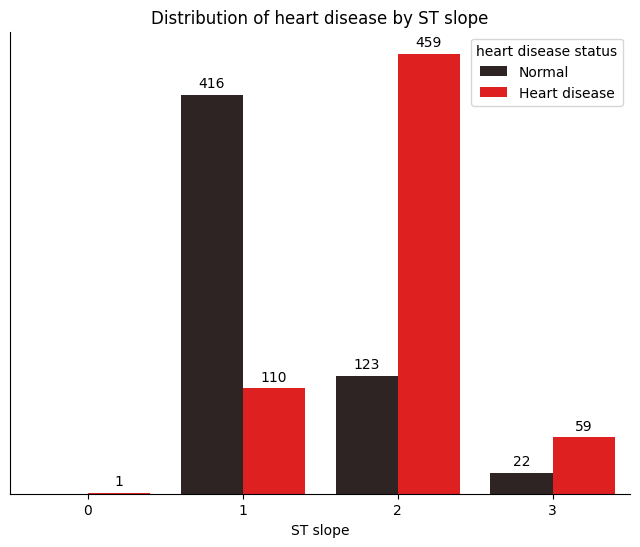

In [31]:
#visualizing the count of our target variable by ST slope
plt.figure(figsize=(8,6))
ax = sns.countplot(heart_disease_data,hue="target", x='ST slope', color = 'red')

handles, labels = ax.get_legend_handles_labels()
labels = ['Heart disease' if label == '1' else 'Normal' for label in labels]
ax.legend(handles, labels, title='heart disease status')

ax.set(ylabel='')
ax.set(yticks=[])
ax.tick_params(left=False)

# Removing the black line surrounding the chart
sns.despine()

#Adding counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Skip the annotation for bars with height 0
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', 
                    xytext=(0, 8), 
                    textcoords='offset points')
        



#Showing the plot

plt.title('Distribution of heart disease by ST slope')
plt.show()

- Most individuals with a heart disease had the slope of their peak exercise ST segment as flat
- While majority of individuals having the slope of their peak exercise ST segment as downsloping have no heart disease


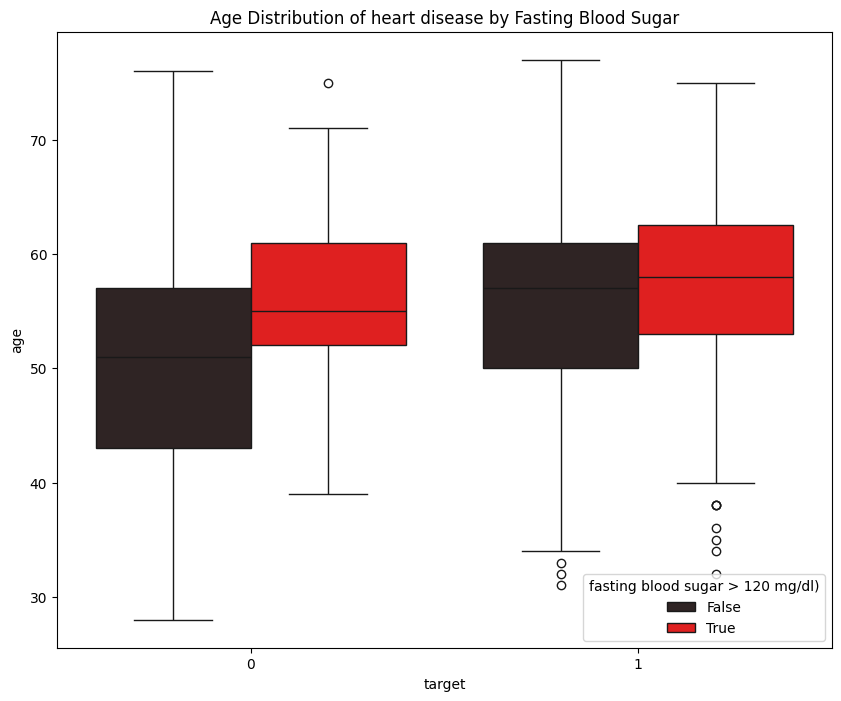

In [32]:
#visualizing the Age Distribution of our target variable by Fasting Blood Sugar
plt.figure(figsize=(10,8))
ax = sns.boxplot(heart_disease_data,x="target", y="age",hue="fasting blood sugar", color = 'red')
plt.title('Age Distribution of heart disease by Fasting Blood Sugar')

handles, labels = ax.get_legend_handles_labels()
labels = ['True' if label == '1' else 'False' for label in labels]
ax.legend(handles, labels, title='fasting blood sugar > 120 mg/dl)')
plt.show()

- Individuals with heart disease having fasting blood sugar > 120 mg/dl had a median age of 58

- While those not having fasting blood sugar > 120 mg/dl had a median age of 57

   target  fasting blood sugar  count  total_count  percentage
0       0                    0    494          561   88.057041
1       0                    1     67          561   11.942959
2       1                    0    442          629   70.270270
3       1                    1    187          629   29.729730


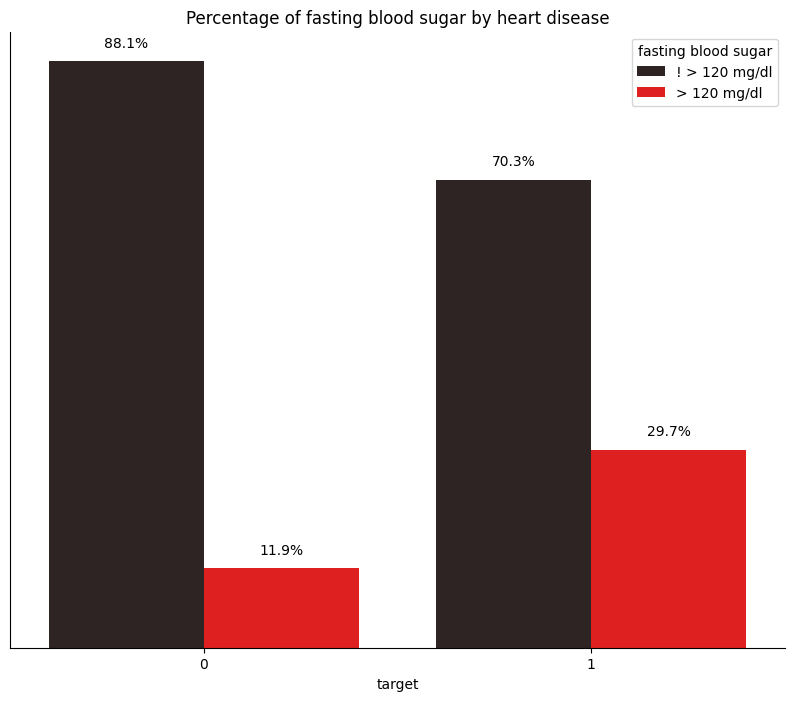

In [33]:
#plotting the percentage distribution of fasting blood sugar by our target variable
counts = heart_disease_data.groupby(['target', 'fasting blood sugar']).size().reset_index(name='count')
total_counts = counts.groupby('target')['count'].sum().reset_index(name='total_count')
percentages = counts.merge(total_counts, on='target')
percentages['percentage'] = 100 * percentages['count'] / percentages['total_count']

print(percentages)
percentages['fasting blood sugar'] = percentages['fasting blood sugar'].map({0: '! > 120 mg/dl', 1: '> 120 mg/dl'})

#Creating the plot
plt.figure(figsize=(10, 8))
ax = sns.barplot(data=percentages, x='target', y='percentage', hue='fasting blood sugar', color = 'red')
ax.set_title('Percentage of fasting blood sugar by heart disease')

ax.set(ylabel='')
ax.set(yticks=[])
ax.tick_params(left=False)

# Removing the black line surrounding the chart
sns.despine()


#Adingd percentage labels on the outside end of the bars
for p in ax.patches:
    height = p.get_height()  # getting bar height
    if height > 0:  # Skip the annotation for bars with height 0
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', 
                    xytext=(0, 8), 
                    textcoords='offset points')

plt.show()

- 70.3% of individuals with heart disease did not have fasting blood sugar > 120 mg/dl

- 88.1% of individuals without heart disease did not have fasting blood sugar > 120 mg/dl

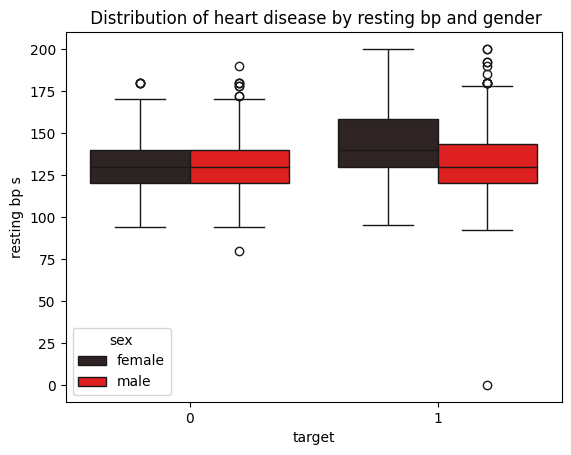

In [34]:
#plotting the Distribution of heart disease by resting bp and sex
ax = sns.boxplot(heart_disease_data,x="target", y="resting bp s",hue="sex", color = 'red')
plt.title(' Distribution of heart disease by resting bp and gender')
handles, labels = ax.get_legend_handles_labels()
labels = ['male' if label == '1' else 'female' for label in labels]
ax.legend(handles, labels, title='sex')


plt.show()


- Male individuals with a heart disease generally had a median resting bp of 130

- Female individuals with a heart disease generally also had a median resting bp of 140

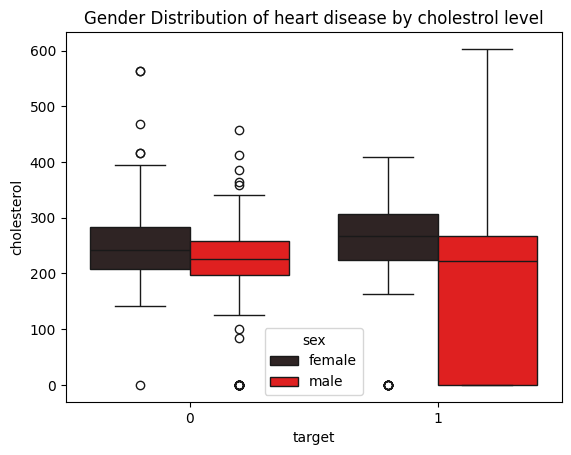

In [35]:
#plotting the Distribution of heart disease by cholestrol level and gender
ax = sns.boxplot(heart_disease_data,x="target", y="cholesterol",hue="sex", color = 'red')
plt.title('Gender Distribution of heart disease by cholestrol level')
handles, labels = ax.get_legend_handles_labels()
labels = ['male' if label == '1' else 'female' for label in labels]
ax.legend(handles, labels, title='sex')

plt.show()

In general, male individuals with heart diseases had higher cholestrol level

Now, let us visualize this more generally using a violin plot to get the density of the distribution

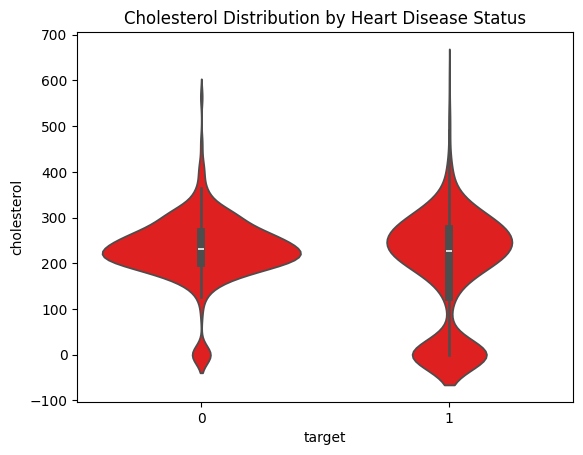

In [36]:
#visualizing the Distribution of heart disease by cholestrol level
sns.violinplot(x='target', y='cholesterol', data=heart_disease_data, color ='red')
plt.title('Cholesterol Distribution by Heart Disease Status')

plt.show()

Majority of individuals with a heart disease have a cholestrol level between 180-320

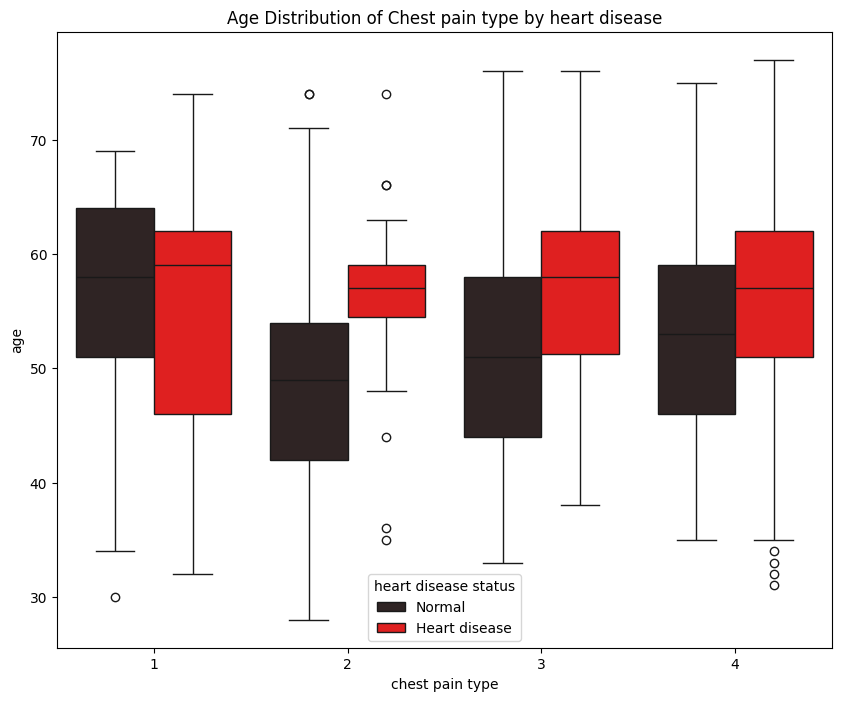

In [37]:
#visualizing Age Distribution of Chest pain type by heart disease
plt.figure(figsize=(10, 8))
ax =sns.boxplot(heart_disease_data, hue="target", x="chest pain type", y="age", color = 'red')
plt.title('Age Distribution of Chest pain type by heart disease')
handles, labels = ax.get_legend_handles_labels()
labels = ['Heart disease' if label == '1' else 'Normal' for label in labels]
ax.legend(handles, labels, title='heart disease status')


plt.show()

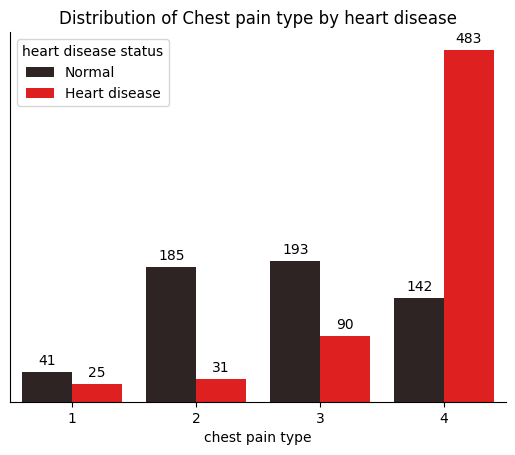

In [38]:
#visualizing the Distribution of Chest pain type by heart disease
ax = sns.countplot(heart_disease_data, hue="target", x="chest pain type",  color = 'red')

ax.set(ylabel='')
ax.set(yticks=[])
ax.tick_params(left=False)

# Remove the black line surrounding the chart
sns.despine()

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Skip the annotation for bars with height 0
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', 
                    xytext=(0, 8), 
                    textcoords='offset points')

plt.title('Distribution of Chest pain type by heart disease')
handles, labels = ax.get_legend_handles_labels()
labels = ['Heart disease' if label == '1' else 'Normal' for label in labels]
ax.legend(handles, labels, title='heart disease status')
plt.show()

- Most individuals (483) with asymptomatic chest pain (i.e 4) had heart disease

- Only 31 individuals with atypical angina had heart disease

### Data Preprocessing

In [39]:
#viewing the first five rows of our data
heart_disease_data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [40]:
#printing the columns in our dataframe
heart_disease_data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [41]:
#checking for null values
heart_disease_data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

We see that there are no missing values

In [42]:
#checking our datatype
heart_disease_data.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [43]:
#checking for duplicates
print(heart_disease_data.duplicated().sum())
heart_disease_data[heart_disease_data.duplicated()]

272


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
163,49,0,2,110,208,0,0,160,0,0.0,1,0
604,58,1,3,150,219,0,1,118,1,0.0,2,1
887,63,1,1,145,233,1,2,150,0,2.3,3,0
888,67,1,4,160,286,0,2,108,1,1.5,2,1
889,67,1,4,120,229,0,2,129,1,2.6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,42,1,3,130,180,0,0,150,0,0.0,1,0
1157,61,1,4,140,207,0,2,138,1,1.9,1,1
1158,66,1,4,160,228,0,2,138,0,2.3,1,0
1159,46,1,4,140,311,0,0,120,1,1.8,2,1


We see that these duplicates are not duplicated consistently along rows hence, we fail to drop them

In [44]:
#checking for unique values
heart_disease_data.nunique()

age                     50
sex                      2
chest pain type          4
resting bp s            67
cholesterol            222
fasting blood sugar      2
resting ecg              3
max heart rate         119
exercise angina          2
oldpeak                 53
ST slope                 4
target                   2
dtype: int64

In [45]:
#writing a function that prints the unique values in our dataframe for each column where the unique value is between 1 and 5
def unique_val(data):
    for col in data.columns:
        unique_values = data[col].unique()
        num_unique_values = len(unique_values)
        if 1 < num_unique_values < 5:
            print(f'Here are the unique values in {col} column: {unique_values}')

In [46]:
#printing the unique values in the columns
unique_val(heart_disease_data)

Here are the unique values in sex column: [1 0]
Here are the unique values in chest pain type column: [2 3 4 1]
Here are the unique values in fasting blood sugar column: [0 1]
Here are the unique values in resting ecg column: [0 1 2]
Here are the unique values in exercise angina column: [0 1]
Here are the unique values in ST slope column: [1 2 3 0]
Here are the unique values in target column: [0 1]


From our exploratory analysis, we noted that there were four different categories for ST slope instead of three which are upsloping (1), flat (2), and downsloping (3). Now, we will filter out our dataset to see only rows with '0' which does not have any category

In [47]:
ST_slope0 = heart_disease_data[heart_disease_data['ST slope'] == 0]
ST_slope0

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
517,68,1,3,150,195,1,0,132,0,0.0,0,1


We will have to drop this row since we can't detect which label the ST slope '0' falls under

In [48]:
heart_disease_data = heart_disease_data.drop(index = [517, ]) #dropping the unwanted row
heart_disease_data['ST slope'].unique()  #checking for the unique values in the ST slope column


array([1, 2, 3], dtype=int64)

Now, our data has been corrected

Next, from our EDA, we also noticed that there are negative oldpeak values as seen below.

In [49]:
heart_disease_data[heart_disease_data['oldpeak'] < 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
322,63,1,4,100,0,1,0,109,0,-0.9,2,1
325,46,1,4,100,0,1,1,133,0,-2.6,2,1
326,42,1,4,105,0,1,0,128,1,-1.5,3,1
327,45,1,3,110,0,0,0,138,0,-0.1,1,0
332,56,1,4,115,0,1,1,82,0,-1.0,1,1
333,38,1,3,100,0,0,0,179,0,-1.1,1,0
335,51,1,4,130,0,1,0,170,0,-0.7,1,1
336,62,1,1,120,0,1,2,134,0,-0.8,2,1
353,56,1,4,120,0,0,1,100,1,-1.0,3,1
408,62,1,4,115,0,1,0,72,1,-0.5,2,1


We will convert them to positive numbers using absolute value

In [50]:
heart_disease_data['oldpeak'] = heart_disease_data['oldpeak'].abs() #converting to positive
heart_disease_data[heart_disease_data['oldpeak'] < 0]   #confirming our conversion                                               
                                                   

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target


Now we have converted this column's negative numbers to positive numbers.

Next, from our EDA we notice that the cholestrol columns has some instances that are zero but
Serum Cholesterol of a person cannot be 0. Hence, these zeros will be replaced with median value of this columns. 

In [51]:
heart_disease_data[heart_disease_data['cholesterol']==0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
294,65,1,4,115,0,0,0,93,1,0.0,2,1
295,32,1,1,95,0,1,0,127,0,0.7,1,1
296,61,1,4,105,0,1,0,110,1,1.5,1,1
297,50,1,4,145,0,1,0,139,1,0.7,2,1
298,57,1,4,110,0,1,1,131,1,1.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
515,43,1,4,122,0,0,0,120,0,0.5,1,1
516,63,1,3,130,0,1,1,160,0,3.0,2,0
519,48,1,3,102,0,1,1,110,1,1.0,3,1
536,56,1,4,130,0,0,2,122,1,1.0,2,1


In [52]:
#replacing these zero's by the median value
median_chol = heart_disease_data['cholesterol'].median()
heart_disease_data.loc[heart_disease_data['cholesterol'] == 0, 'cholesterol'] = median_chol
heart_disease_data[heart_disease_data['cholesterol']==0] #confirming that the replacement was done

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target


Now, the replacement have been made, we will implement the same operation on the resting bp s column since Resting Blood presure of a person can never be zero

In [53]:
heart_disease_data[heart_disease_data['resting bp s']==0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
450,55,1,3,0,229,0,0,155,0,1.5,2,1


In [54]:
median_resbp = heart_disease_data['resting bp s'].median()
heart_disease_data.loc[heart_disease_data['resting bp s'] == 0, 'resting bp s'] = median_chol
heart_disease_data[heart_disease_data['resting bp s']==0]   #confirming that the replacement was done

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target


Now let us check for brief desriptive statistics

In [55]:
#checking for brief descriptive statistics
heart_disease_data.describe(include = 'all')

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,0.763667,3.232969,132.331371,243.503785,0.212784,0.698907,139.739277,0.387721,0.945080,1.625736,0.528175
std,9.352961,0.425008,0.935850,18.182192,53.279323,0.409448,0.870489,25.527386,0.487435,1.067772,0.608893,0.499416
min,28.000000,0.000000,1.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,214.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,141.000000,0.000000,0.700000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,270.000000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,229.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


Now, we see that 75% of values in the fasting blood sugar column is '0'. Hence, this column will not have much impact on our predictions.

Now, we will drop this column

In [56]:
heart_disease_data = heart_disease_data.drop('fasting blood sugar', axis = 1)

Now, let us view a subset of our dataframe

In [57]:
#printing the first five rows
heart_disease_data.head()

,age,sex,chest pain type,resting bp s,cholesterol,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,172,0,0.0,1,0
1,49,0,3,160,180,0,156,0,1.0,2,1
2,37,1,2,130,283,1,98,0,0.0,1,0
3,48,0,4,138,214,0,108,1,1.5,2,1
4,54,1,3,150,195,0,122,0,0.0,1,0


Let us re-examind our descriptive statistics and unique values

In [58]:
unique_val(heart_disease_data)

Here are the unique values in sex column: [1 0]
Here are the unique values in chest pain type column: [2 3 4 1]
Here are the unique values in resting ecg column: [0 1 2]
Here are the unique values in exercise angina column: [0 1]
Here are the unique values in ST slope column: [1 2 3]
Here are the unique values in target column: [0 1]


In [59]:
#checking the descriptive statistics
heart_disease_data.describe(include='all')

,age,sex,chest pain type,resting bp s,cholesterol,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000
mean,53.708158,0.763667,3.232969,132.331371,243.503785,0.698907,139.739277,0.387721,0.945080,1.625736,0.528175
std,9.352961,0.425008,0.935850,18.182192,53.279323,0.870489,25.527386,0.487435,1.067772,0.608893,0.499416
min,28.000000,0.000000,1.000000,80.000000,85.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,214.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,141.000000,0.000000,0.700000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,270.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,229.000000,603.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


considering the fact that our data has been previously encoded, our data is now in a good format

Let us seperate our data into our features and target

In [60]:
X= heart_disease_data.drop(columns= 'target', axis=1).values #features
y = heart_disease_data['target'].values #target

We will now split the dataset into train and validation (named test) data, giving our train data 70% of the dataset

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42) #splitting the dataset

In [62]:
#numerical_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

Now, it is time to scale our dataset to ensure that each feature is contributing equally to our dataset.

We will be using the Robust scaler as it is more resistant to outliers and there are outliers in our dataset

Unlike StandardScaler, which uses the mean and standard deviation, RobustScaler uses the median and the interquartile range (IQR). This makes it less sensitive to outliers.
The median and IQR are robust statistics, meaning they are less affected by extreme values.

The robust scaler  scales data according to the range between the 25th percentile (1st quartile) and the 75th percentile (3rd quartile), often referred to as the IQR. This ensures that the central part of the data (which is not affected by outliers) is scaled appropriately while maintaining the shape of the data distribution.

In [63]:
robust_scaler= RobustScaler()
x_train=robust_scaler.fit_transform(X_train)
x_test=robust_scaler.transform(X_test)

checking the shape of our test and train datasets

In [64]:
#checking the shape of our train data
x_test.shape

(357, 10)

In [65]:
#checking the shape of our test data
x_train.shape

(832, 10)

Now, our Data is  ready for Model building

### Model Building

We start by definning our model architecture, a simple neural network with 6 hidden layers

In [66]:
# Define the model architecture
def create_model_without_dropout():
    model = Sequential()
    model.add(Dense(16, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))
    
    return model

Since we have created our model, we will define a dictionary of 12 optimizers we want to evaluate

In [67]:
# Define optimizers to evaluate
optimizers = {
    'SGD': SGD(),
    'Adam': Adam(),
    'RMSprop': RMSprop(),
    'Adagrad': Adagrad(),
    'Adadelta': Adadelta(),
    'Adamax': Adamax(),
    'Nadam': Nadam(),
    'Ftrl': Ftrl(),
    'AMSgrad': Adam(amsgrad=True),
    'AdamW': Adam(amsgrad=False),
    'sgd_momentum': SGD(momentum=0.9),
    'sgd_nesterov': SGD(nesterov=True),
}

Now we will train these optimizers and evaluate them in conjuction with our model using the following metrics

- convergence speed
- Time to convergence
- Stability
- AUC_ROC 
- precision
- recall


#### Brief note on these metrics

##### Stability:
Stability refers to the consistency of the training process, typically measured as the standard deviation of validation loss across epochs, indicating smooth and predictable learning.
Stability ensures reliable model training and convergence, minimizing erratic learning behaviors. It is vital for model robustness and reliability, particularly in critical applications where consistency is paramount.

##### Time to Convergence:
Time to convergence is the number of epochs or training duration required for the model to reach a satisfactory level of performance or minimal loss.
Time to convergence is essential for efficiency, impacting computational resources and training time. Optimizers that converge faster can reduce costs and allow more rapid experimentation.

##### Convergence Speed:
Convergence speed quantifies the rate at which the model's training loss decreases per epoch. It reflects the efficiency of the optimizer in minimizing loss quickly. A higher convergence speed indicates a more efficient optimizer, reducing training time and resource usage.

##### Area Under the Receiver Operating Characteristic Curve (AUC-ROC):
AUC-ROC measures the ability of a model to distinguish between classes, plotting the true positive rate against the false positive rate at various thresholds.
AUC-ROC is crucial for evaluating classifiers on imbalanced datasets, as it reflects the model’s ability to correctly rank positive instances higher than negatives, irrespective of classification thresholds.


##### Precision:
Precision, or positive predictive value, is the ratio of true positive predictions to the sum of true positive and false positive predictions, indicating the accuracy of positive predictions.
Precision is vital in where false positives are costly or undesirable, as it focuses on the quality of positive class predictions, ensuring fewer incorrect positive identifications.

##### Recall:
Recall, or sensitivity, measures the proportion of actual positive cases correctly identified by the model. It is the ratio of true positive predictions to the total actual positives.



In [68]:
# Training and evaluating the model
results = {}
convergence_epochs = {}
convergence_speeds = {}
histories = {}  # Store histories for plotting


for name, optimizer in optimizers.items():
    print(f"\nTraining with {name} optimizer")
    model = create_model_without_dropout()
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['auc', 'precision', 'recall'])
    # Train the model and record the history
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    histories[name] = history
    
    # Determine time to convergence
    convergence_epoch = np.argmin(history.history['val_loss'])
    convergence_epochs[name] = convergence_epoch

    # Calculate convergence speed (average reduction in loss per epoch)
    initial_loss = history.history['loss'][0]
    final_loss = history.history['loss'][convergence_epoch]
    convergence_speed = (initial_loss - final_loss) / convergence_epoch
    convergence_speeds[name] = convergence_speed
    
# Calculate Stability (Standard deviation of validation loss)
stability = {name: np.std(histories[name].history['val_loss']) for name in optimizers.keys()}


Training with SGD optimizer

Training with Adam optimizer

Training with RMSprop optimizer

Training with Adagrad optimizer

Training with Adadelta optimizer

Training with Adamax optimizer

Training with Nadam optimizer

Training with Ftrl optimizer

Training with AMSgrad optimizer

Training with AdamW optimizer

Training with sgd_momentum optimizer

Training with sgd_nesterov optimizer


In [69]:
results

{}

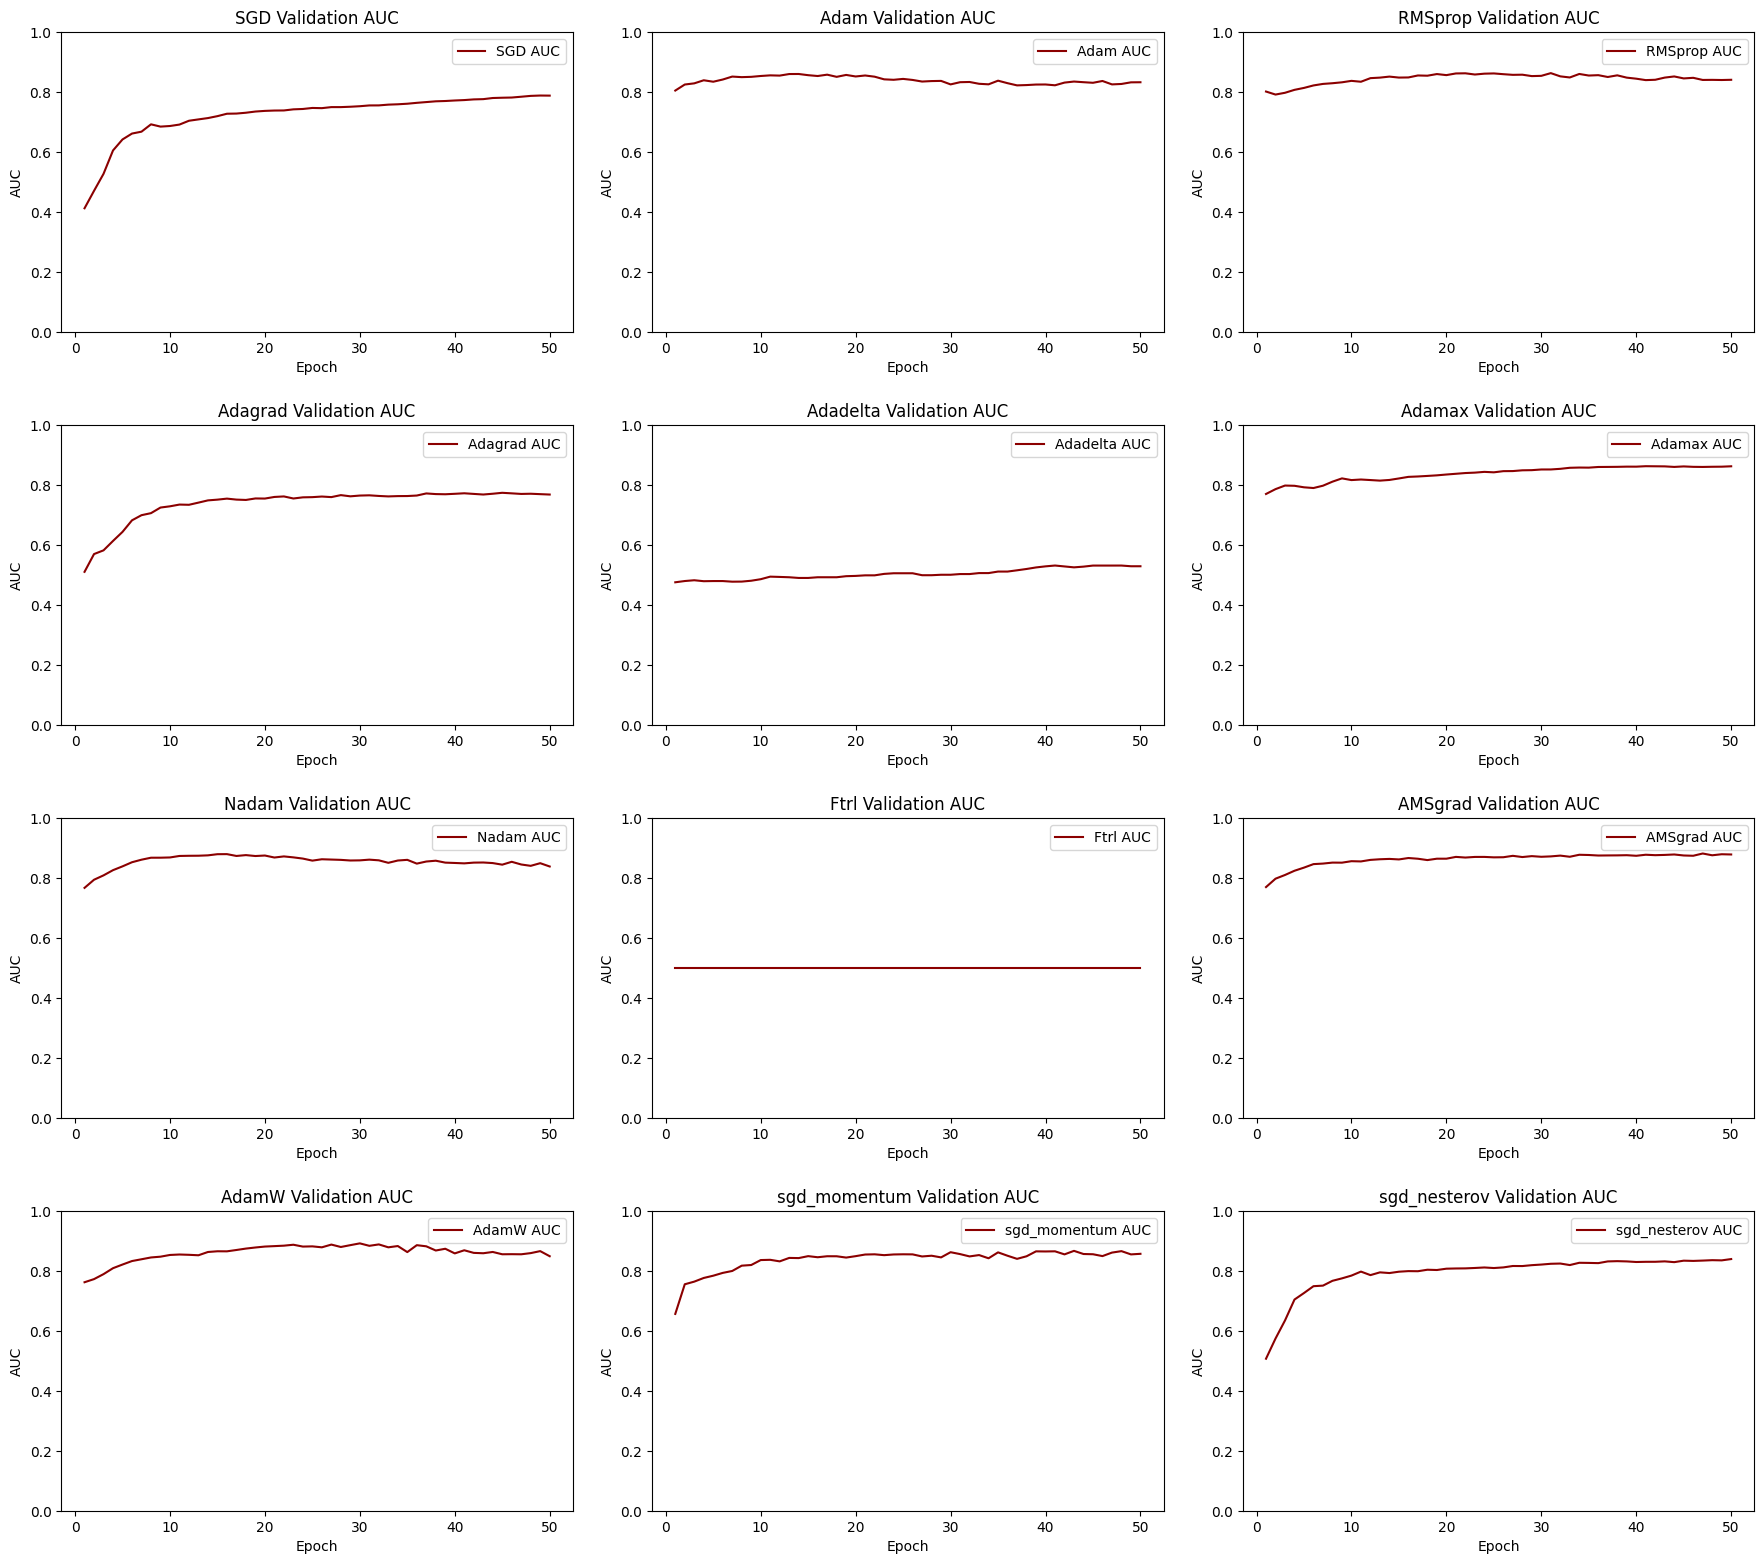

In [70]:
# Create subplots for AUC trend lines
epochs = np.arange(1, 51)  # Assuming 50 epochs

num_optimizers = len(optimizers)
num_cols = 3
num_rows = (num_optimizers + num_cols - 1) // num_cols  # Calculate the number of rows

plt.figure(figsize=(18, num_rows * 4))

# Plot each optimizer's AUC as a subplot
for idx, (optimizer, history) in enumerate(histories.items()):
    plt.subplot(num_rows, num_cols, idx + 1)
    plt.plot(epochs, history.history['val_auc'], label=f'{optimizer} AUC', color='#8B0000')
    plt.title(f'{optimizer} Validation AUC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.ylim(0, 1)  # Set the y-axis limits to [0, 1] for AUC
    plt.legend()
    plt.tight_layout(pad=2.0)

# Show the plot
plt.show()

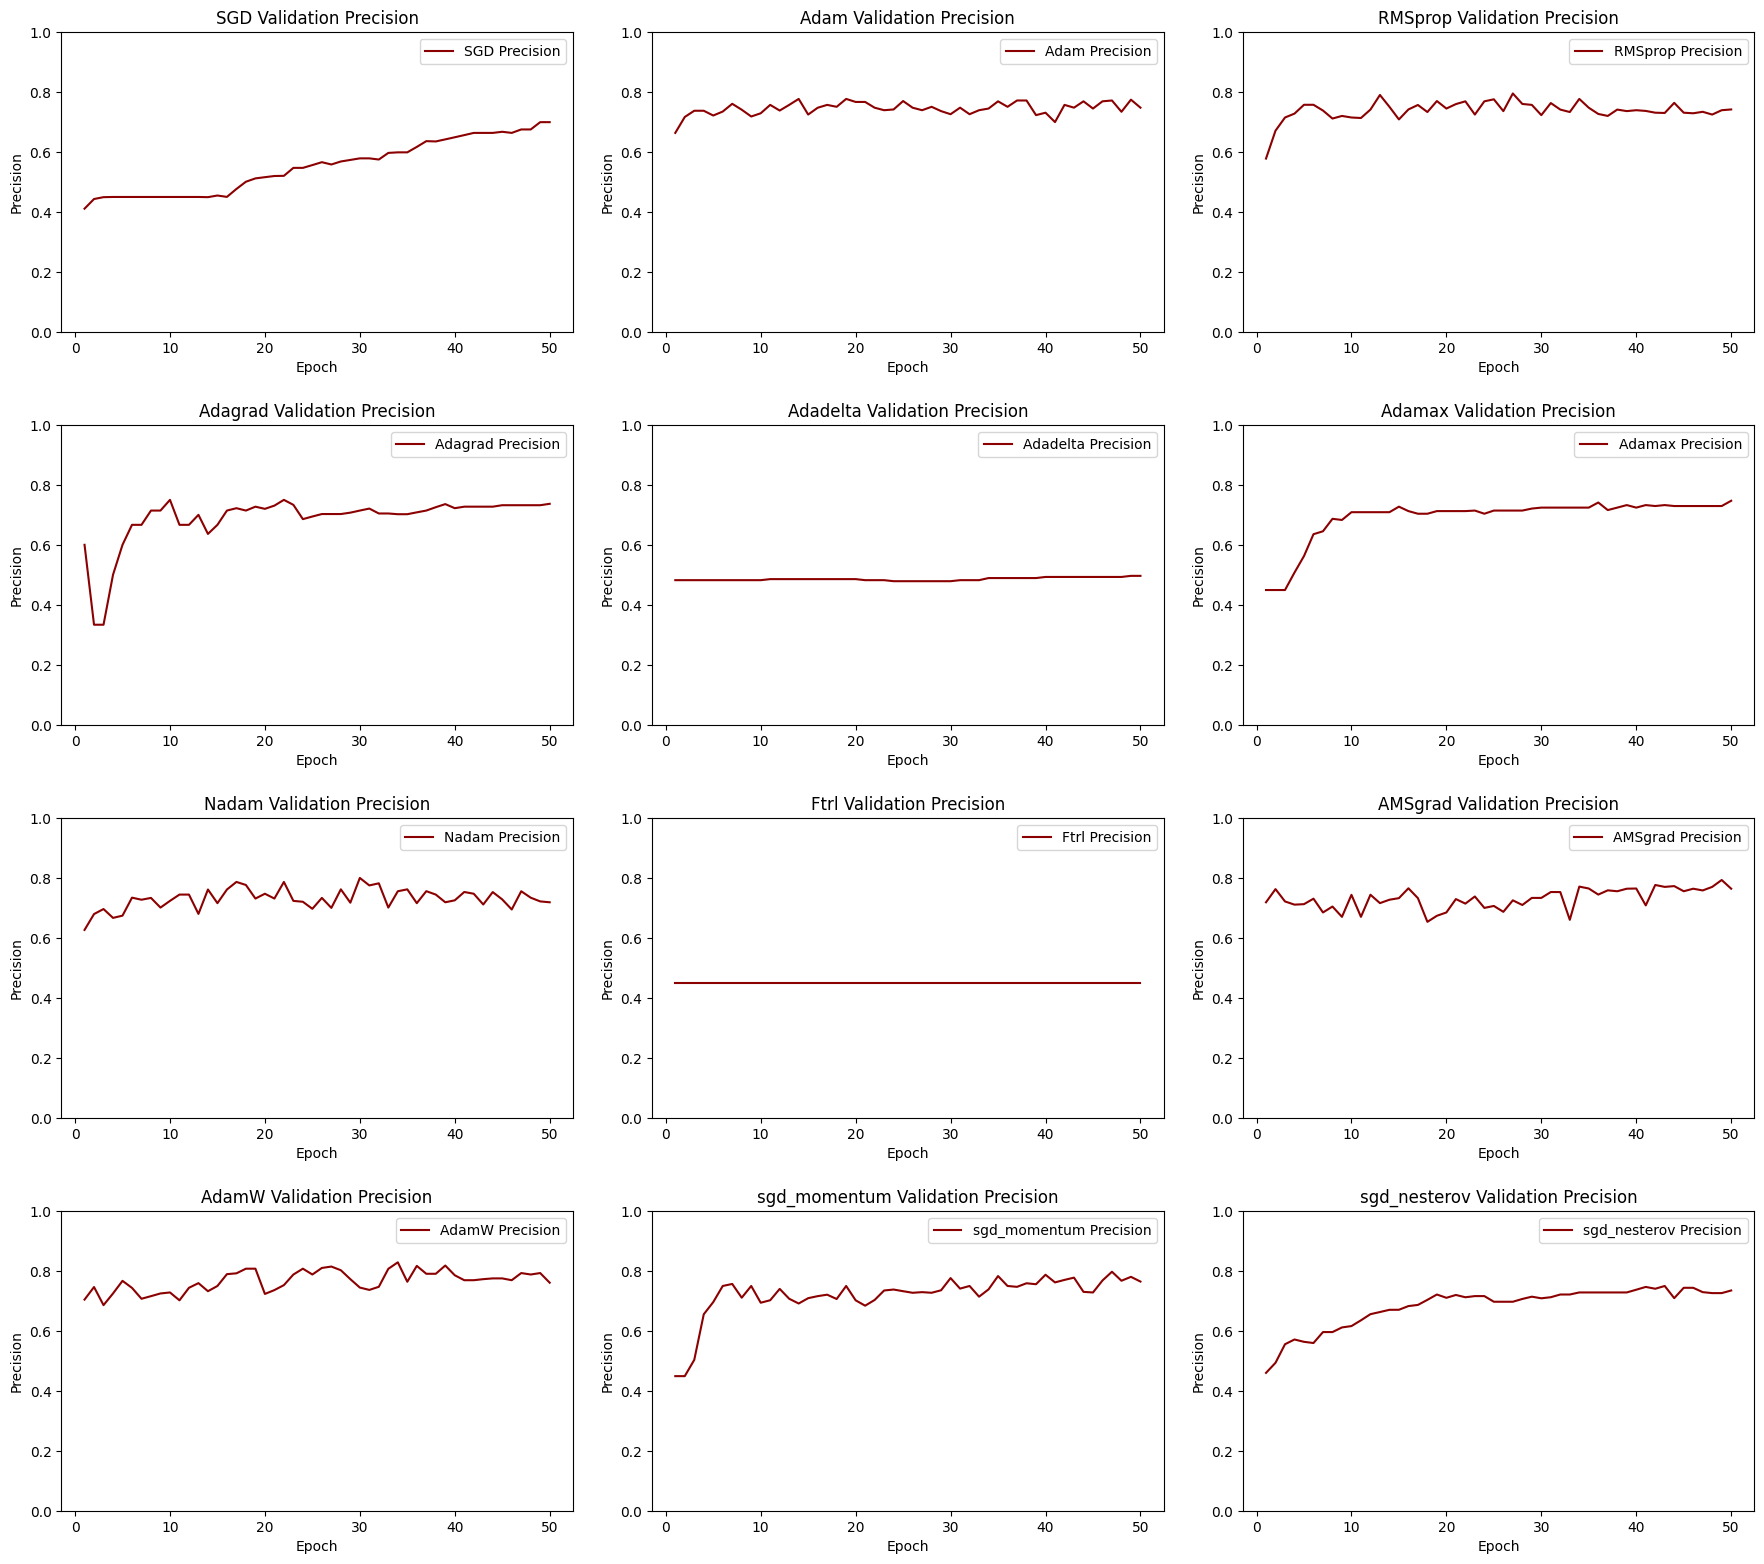

In [71]:

# Create subplots for AUC trend lines
epochs = np.arange(1, 51)  # Assuming 50 epochs

num_optimizers = len(optimizers)
num_cols = 3
num_rows = (num_optimizers + num_cols - 1) // num_cols  # Calculate the number of rows

plt.figure(figsize=(18, num_rows * 4))

# Plot each optimizer's AUC as a subplot
for idx, (optimizer, history) in enumerate(histories.items()):
    plt.subplot(num_rows, num_cols, idx + 1)
    plt.plot(epochs, history.history['val_precision'], label=f'{optimizer} Precision', color='#8B0000')
    plt.title(f'{optimizer} Validation Precision')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.ylim(0, 1)  # Set the y-axis limits to [0, 1] for AUC
    plt.legend()
    plt.tight_layout(pad=2.0)

# Show the plot
plt.show()

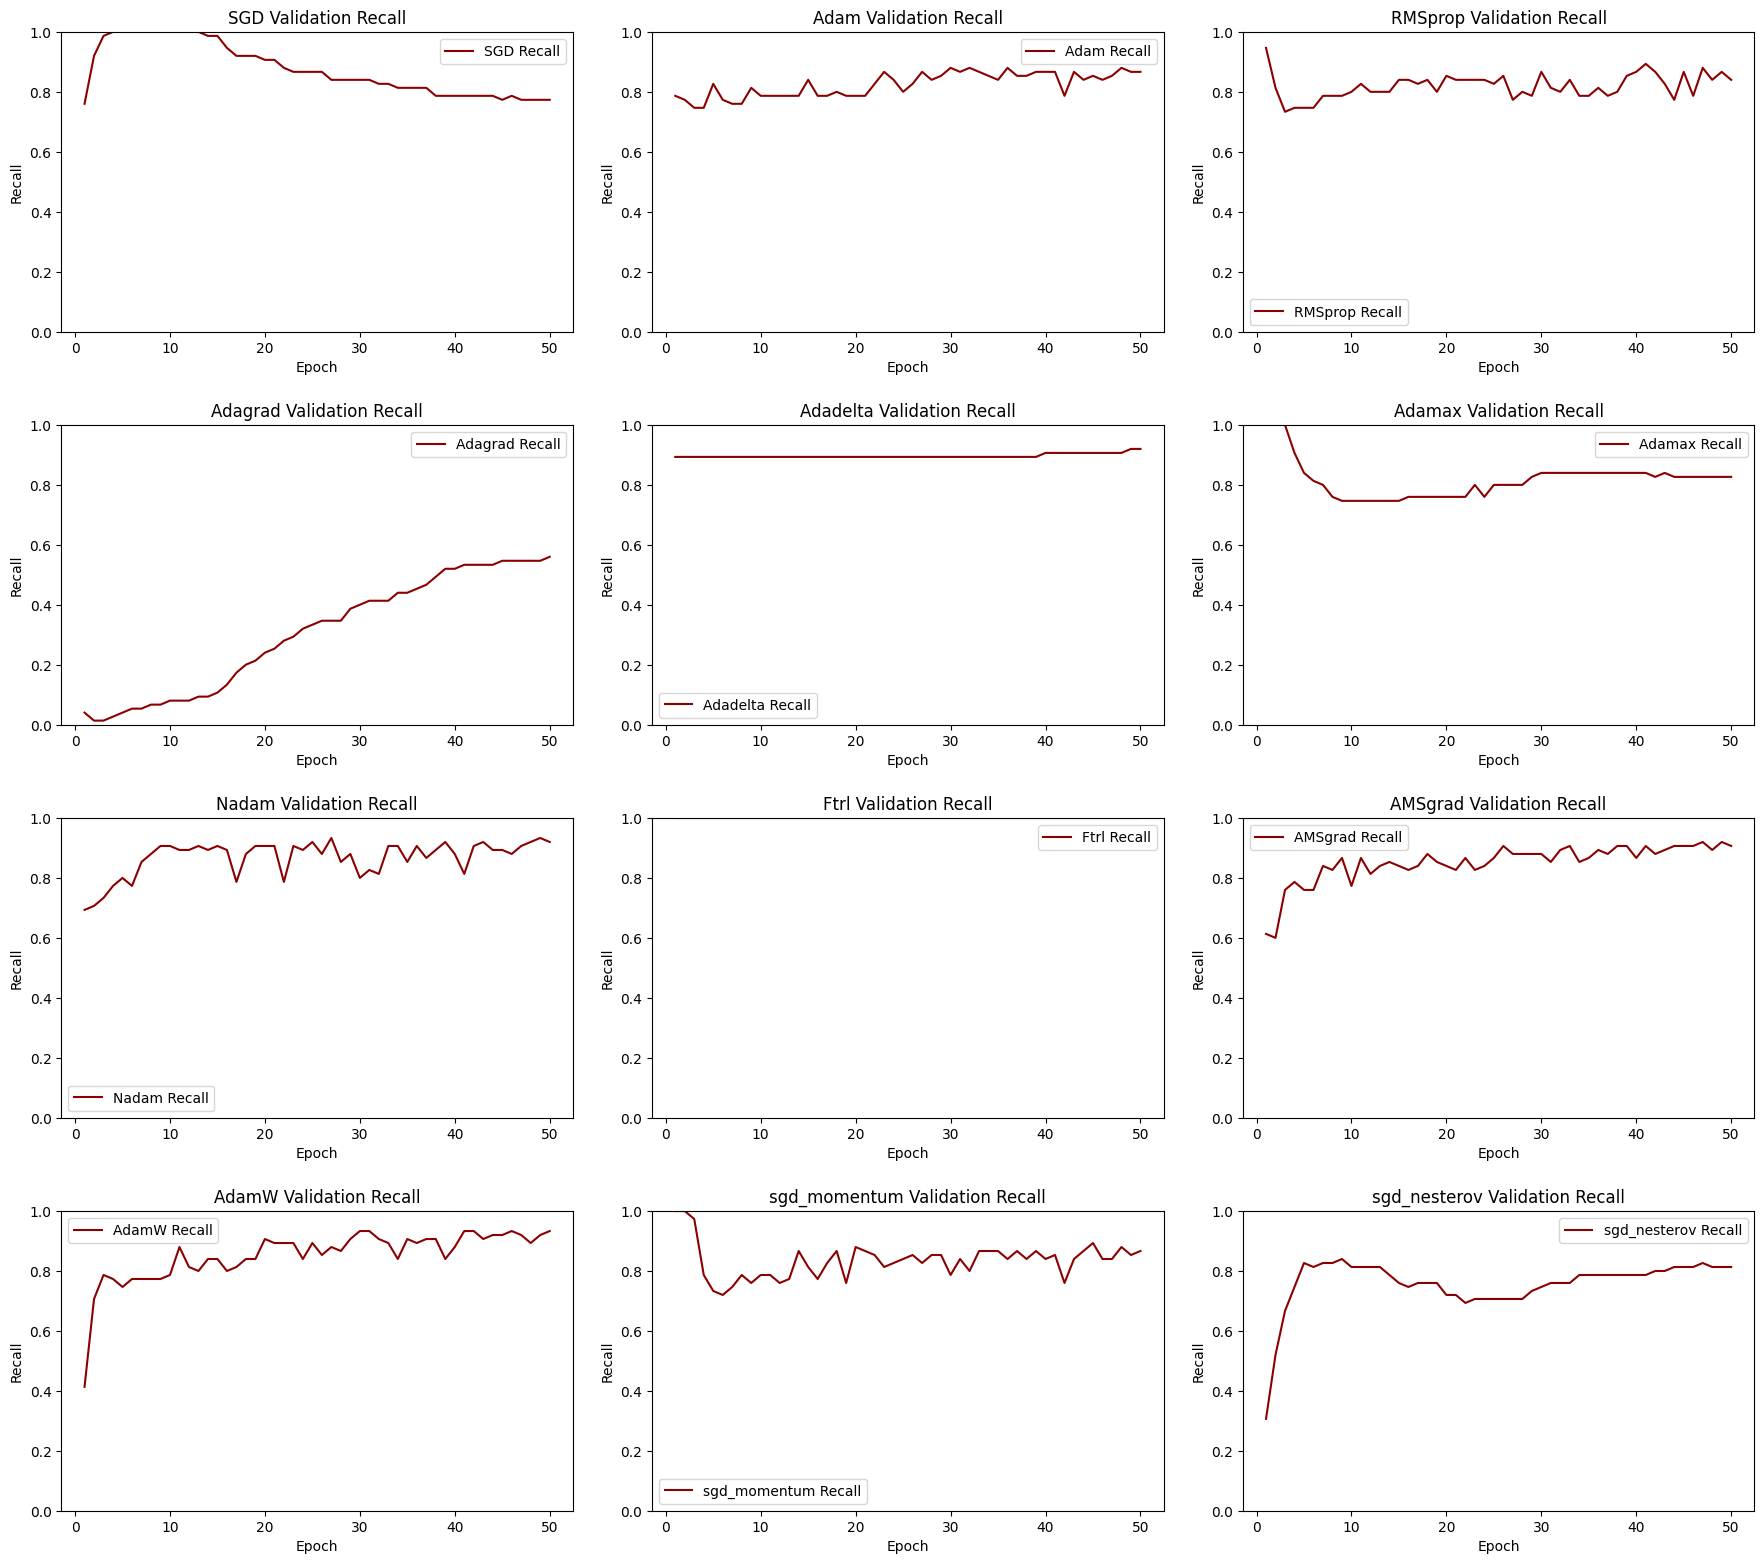

In [72]:
# Create subplots for AUC trend lines
epochs = np.arange(1, 51)  # Assuming 50 epochs

num_optimizers = len(optimizers)
num_cols = 3
num_rows = (num_optimizers + num_cols - 1) // num_cols  # Calculate the number of rows

plt.figure(figsize=(18, num_rows * 4))

# Plot each optimizer's AUC as a subplot
for idx, (optimizer, history) in enumerate(histories.items()):
    plt.subplot(num_rows, num_cols, idx + 1)
    plt.plot(epochs, history.history['val_recall'], label=f'{optimizer} Recall', color='#8B0000')
    plt.title(f'{optimizer} Validation Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.ylim(0, 1)  # Set the y-axis limits to [0, 1] for AUC
    plt.legend()
    plt.tight_layout(pad=2.0)

# Show the plot
plt.show()

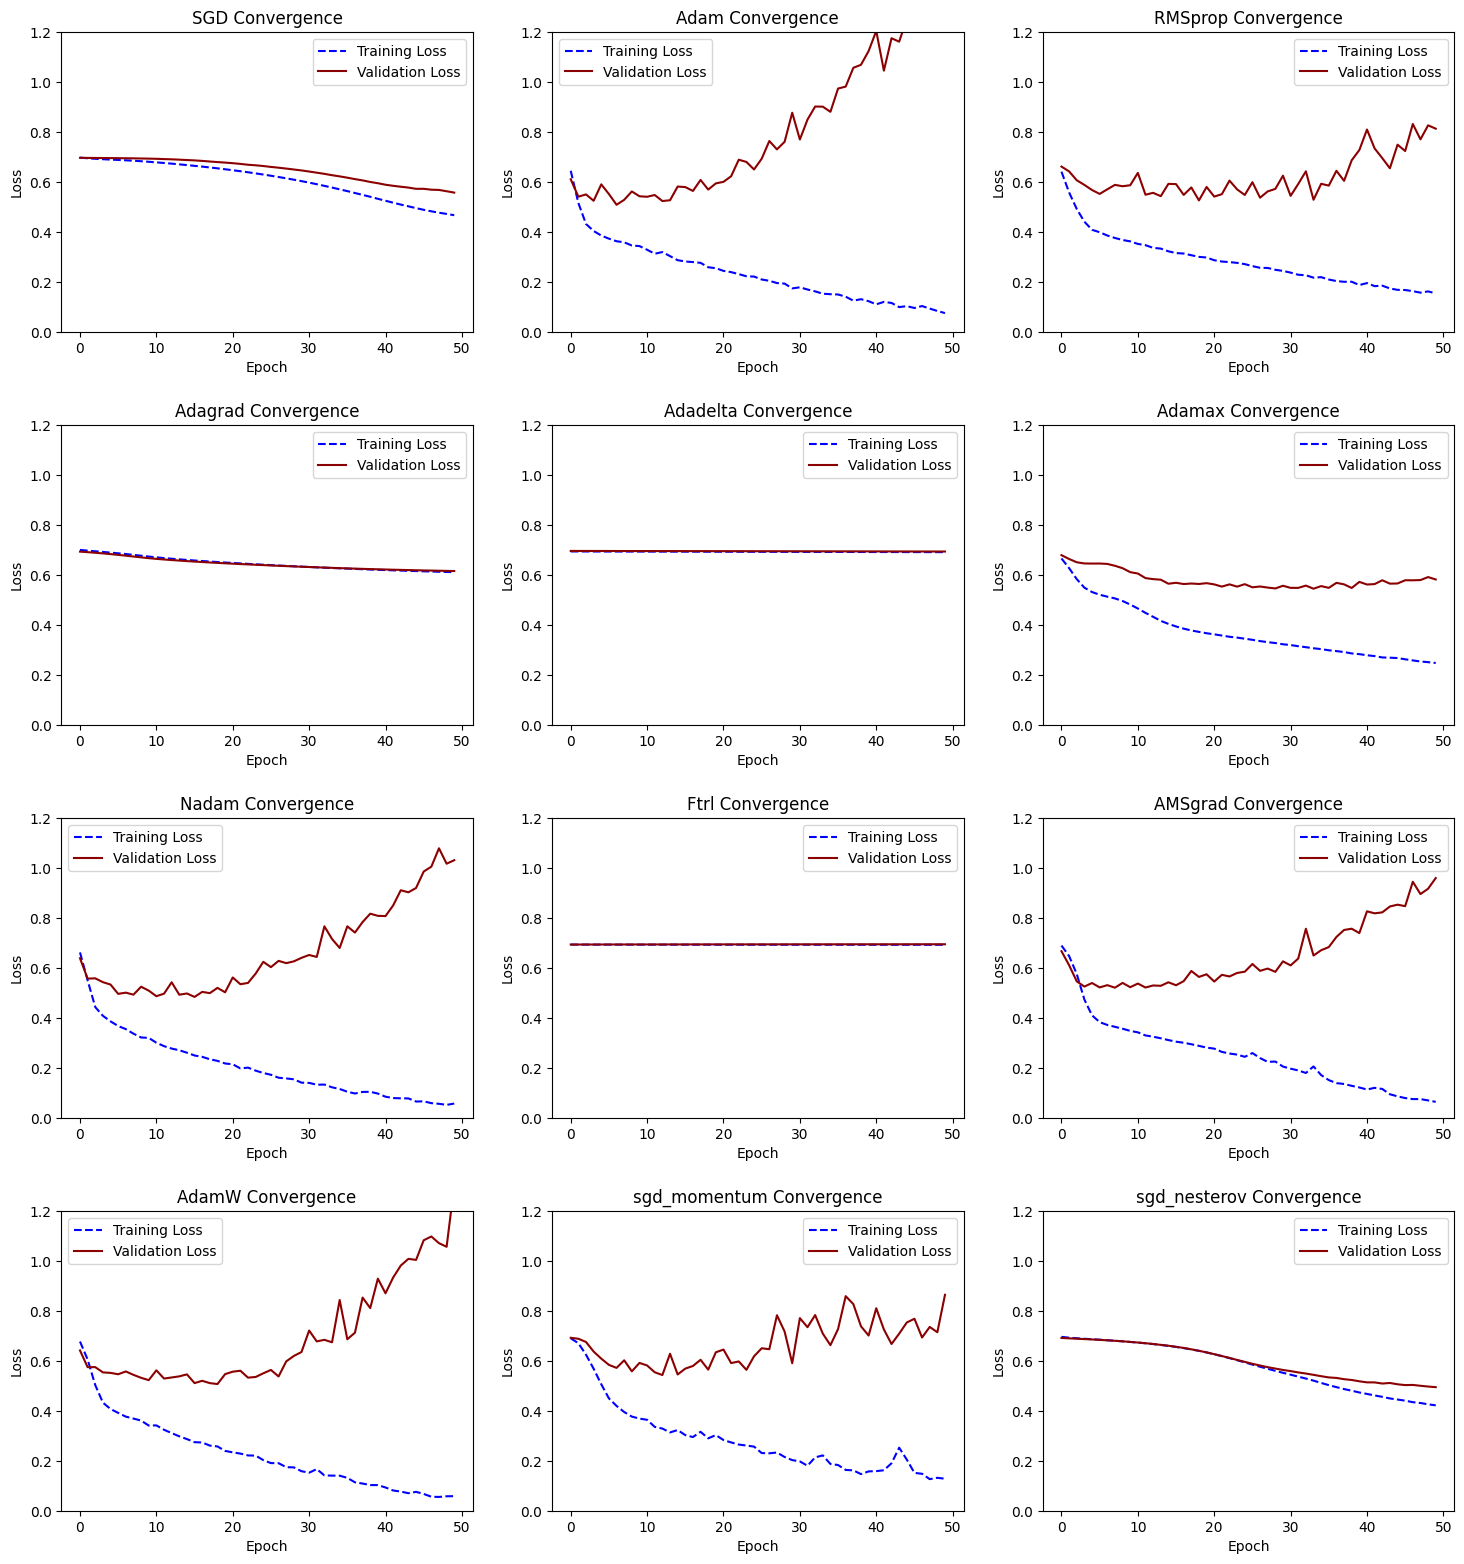

In [73]:
# Number of optimizers to plot
num_optimizers = len(histories)
optimizers = list(histories.keys())

# Calculate the number of rows and columns needed for subplots
num_cols = 3
num_rows = (num_optimizers + num_cols - 1) // num_cols  # Round up division

# Create a figure for subplots
plt.figure(figsize=(15, num_rows * 4))

# Plot each optimizer's training and validation loss in a separate subplot
for idx, name in enumerate(optimizers):
    plt.subplot(num_rows, num_cols, idx + 1)
    
    # Plot Training Loss
    plt.plot(histories[name].history['loss'], linestyle='--',  label='Training Loss', color='blue')
    
    # Plot Validation Loss
    plt.plot(histories[name].history['val_loss'],label='Validation Loss', color='#8B0000')
    
    plt.title(f'{name} Convergence')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(0, 1.2)  # Set the y-axis limits to encompass the loss range
    plt.legend()
    plt.tight_layout(pad=2.0)

# Show the plot
plt.show()


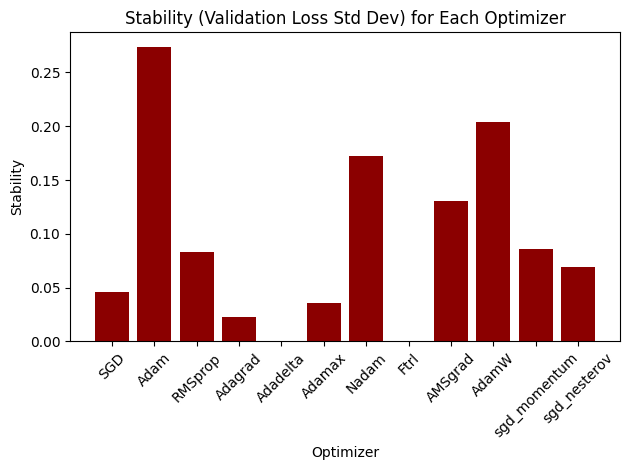

In [74]:
# Extract stability values in the order of the optimizers
stability_values = [stability[name] for name in optimizers]

# Plot stability as a line plot
plt.bar(optimizers, stability_values, color= '#8B0000', linestyle='-')
plt.title('Stability (Validation Loss Std Dev) for Each Optimizer')
plt.xlabel('Optimizer')
plt.ylabel('Stability')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [75]:
# Define the model architecture, adding dropouts

# Define the model architecture
def create_model_with_dropout(learning_rate=0.001):
    model = Sequential()
    model.add(Dense(16, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu')) 
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    
    return model


In [76]:
# Initialize results storage
results = []
convergence_epochs = []
convergence_speeds = []

# Cross-validation and grid search setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1]
}

best_score = 0
best_params = {}
best_results = []

for params in ParameterGrid(param_grid):
    fold = 1
    fold_results = []
    for train_index, val_index in skf.split(x_train, y_train):
        print(f"Fold {fold}")
        fold += 1

        # Split data into train and validation sets
        X_train1, X_val = x_train[train_index], x_train[val_index]
        y_train1, y_val = y_train[train_index], y_train[val_index]

        # Create and compile the model
        model = create_model_with_dropout(learning_rate=params['learning_rate'])
        model.compile(optimizer=Adam(learning_rate=params['learning_rate']), loss='binary_crossentropy', metrics=['AUC', 'Precision', 'Recall'])
        
        # Train the model
        history = model.fit(X_train1, y_train1, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

        # Collecting results
        history_dict = {
            'auc': history.history['val_AUC'],
            'precision': history.history['val_Precision'],
            'recall': history.history['val_Recall'],
        }
        fold_results.append(history_dict)

        # Determine time to convergence
        convergence_epoch = np.argmin(history.history['val_loss'])
        convergence_epochs.append(convergence_epoch)

        # Calculate convergence speed (average reduction in loss per epoch)
        initial_loss = history.history['loss'][0]
        final_loss = history.history['loss'][convergence_epoch]
        convergence_speed = (initial_loss - final_loss) / convergence_epoch
        convergence_speeds.append(convergence_speed)

    # Calculate average metrics across folds for this parameter set
    aucs = [np.max(result['auc']) for result in fold_results]
    precisions = [np.max(result['precision']) for result in fold_results]
    recalls = [np.max(result['recall']) for result in fold_results]
    avg_auc = np.mean(aucs)
    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_convergence_epoch = np.mean(convergence_epochs)
    avg_convergence_speed = np.mean(convergence_speeds)
    
    # Calculate stability (standard deviation of AUCs)
    stability_auc = np.std(aucs)

    average_results = {
        'avg_auc': avg_auc,
        'avg_precision': avg_precision,
        'avg_recall': avg_recall,
        'avg_convergence_epoch': avg_convergence_epoch,
        'avg_convergence_speed': avg_convergence_speed,
        'stability_auc': stability_auc
    }

    results.append(average_results)

    if avg_auc > best_score:
        best_score = avg_auc
        best_params = params
        best_results = fold_results

# Convert results to a DataFrame
results_df = pd.DataFrame(results, index=[str(params) for params in ParameterGrid(param_grid)])


# Print the best parameters and score
print(f"Best Params: {best_params} - Best Score: {best_score} - Best results: {best_results}")

results_df


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Best Params: {'learning_rate': 0.01} - Best Score: 0.912639057636261 - Best results: [{'auc': [0.8420976996421814, 0.8686782121658325, 0.8668822050094604, 0.8807471394538879, 0.9014367461204529, 0.8941092491149902, 0.8928878903388977, 0.8941091895103455, 0.8821120262145996, 0.884482741355896, 0.8766523003578186, 0.8853448033332825, 0.8881465792655945, 0.8826149702072144, 0.8859195113182068, 0.8913074731826782, 0.8913074731826782, 0.8846263885498047, 0.8799569606781006, 0.888002872467041, 0.8948276042938232, 0.8864942789077759, 0.8864224553108215, 0.8895833492279053, 0.8843390941619873, 0.888721227645874, 0.8929597735404968, 0.8877155184745789, 0.8874999284744263, 0.8886494040489197, 0.8822557330131531, 0.8839799165725708, 0.8862787485122681, 0.893965482711792, 0.8948994278907776, 0.8926724195480347, 0.9038074612617493, 0.9041666984558105, 0.8859195113182068, 0.8823275566101074, 0.88

,avg_auc,avg_precision,avg_recall,avg_convergence_epoch,avg_convergence_speed,stability_auc
{'learning_rate': 0.001},0.906492,0.870998,0.887116,44.000000,0.006873,0.014312
{'learning_rate': 0.01},0.912639,0.896472,0.914782,35.000000,0.009658,0.013515
{'learning_rate': 0.1},0.843007,0.947951,1.000000,26.466667,0.018004,0.046778


In [77]:


# Training the final model with the best hyperparameters
best_model = create_model_with_dropout(learning_rate=best_params['learning_rate'])
best_model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss='binary_crossentropy', metrics=['AUC', 'Precision', 'Recall'])
history = best_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test data
y_pred_prob = best_model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

precision = precision_score(y_test, y_pred)
print("precision_score:\n", precision)

recall = recall_score(y_test, y_pred)
print("recall_score:\n", recall)

report = classification_report(y_test, y_pred, output_dict=True)
print("Classification Report:\n", report)

auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {auc_score:.2f}")




Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - AUC: 0.6710 - Precision: 0.6292 - Recall: 0.4042 - loss: 0.6619 - val_AUC: 0.8064 - val_Precision: 0.5965 - val_Recall: 0.9067 - val_loss: 0.6027
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.8088 - Precision: 0.7334 - Recall: 0.8908 - loss: 0.5507 - val_AUC: 0.8470 - val_Precision: 0.7160 - val_Recall: 0.7733 - val_loss: 0.5136
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.8586 - Precision: 0.8112 - Recall: 0.7966 - loss: 0.4783 - val_AUC: 0.8451 - val_Precision: 0.7564 - val_Recall: 0.7867 - val_loss: 0.4949
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.8818 - Precision: 0.8549 - Recall: 0.8160 - loss: 0.4434 - val_AUC: 0.8280 - val_Precision: 0.7439 - val_Recall: 0.8133 - val_loss: 0.5286
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.8930 - Precision: 0.8256 - Recall: 0.8445 - loss: 0.4204 - val_AUC: 0.8528 - val_Precision: 0.7273 - val_Recall: 0.8533 - val_loss: 0.5881
Epoch 6/5

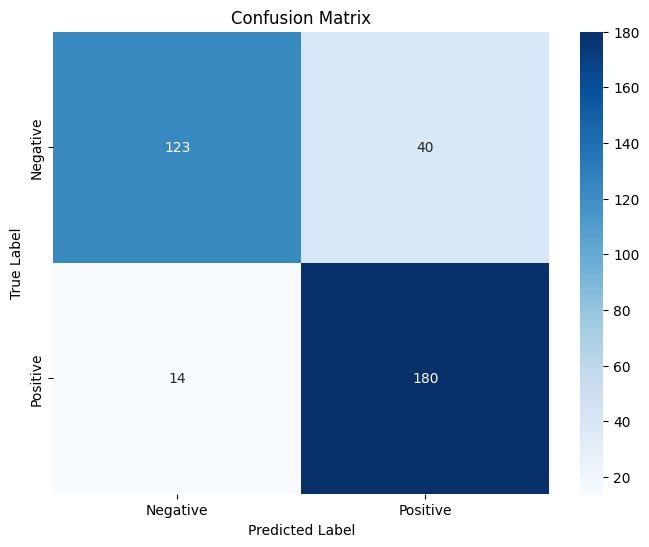

In [78]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

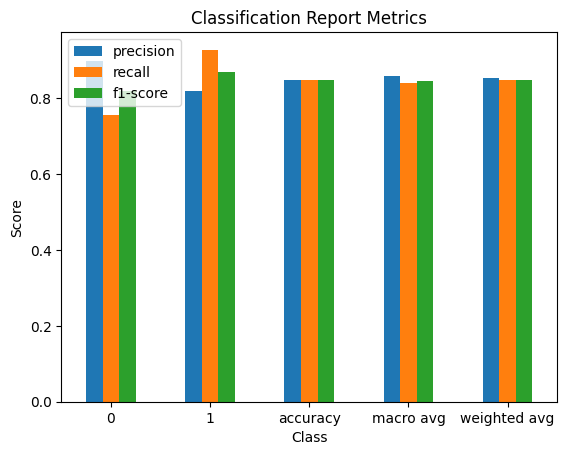

In [79]:
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, and F1-score
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Classification Report Metrics')
plt.legend(loc='best')
plt.show()

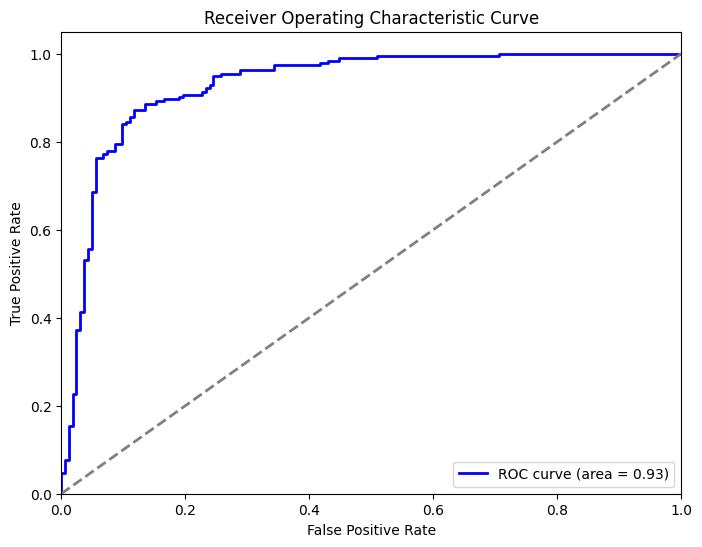

In [80]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

*THE END*